## Setup, Loading Data and CDFs

In [6]:
DATA_NAME = '_-experiments-scaleTesting-samplePrior' # size-name-transform-channel

In [7]:
import git
from pathlib import Path
import os

ROOT_DIR = Path(git.Repo('.', search_parent_directories=True).working_tree_dir)
path_dict = dict(zip(['size', 'name', 'transform', 'channel'], DATA_NAME.split("-")))
CWD = os.path.join(ROOT_DIR, os.path.join("results", "case-studies", path_dict['name'], path_dict['transform'], path_dict['size'], path_dict['channel']))
assert CWD == os.getcwd()
Path(os.path.join(CWD, "CSVs")).mkdir(exist_ok=True)
Path(os.path.join(CWD, "plots")).mkdir(exist_ok=True)
Path(os.path.join(CWD, "cache")).mkdir(exist_ok=True)
Path(os.path.join(CWD, "groupCDFs")).mkdir(exist_ok=True)

GROUP = 'scale'
RERUN = True
CWD

'c:\\Users\\yashd\\Desktop\\hierarchical-bayesian-model-validation\\results\\case-studies\\experiments\\scaleTesting\\_\\samplePrior'

In [8]:
os.chdir(os.path.join(ROOT_DIR, "utilities"))
from testing import * # If MATLAB is not installed, open utilities and set to False
from plotting import *
os.chdir(CWD)
np.random.seed(0)

In [9]:
num_samples = 100000
sigfigs = 4
r, eta = 1, 1
scale_values = sorted([round_to_sigfigs(x, sigfigs) for x in np.logspace(-0.5, 3, 20)] + [round_to_sigfigs(1/np.sqrt(2), sigfigs), 1])
fake_data = { round_to_sigfigs(i) : np.sort(sample_prior(r = r, eta= eta, size = num_samples, scale = i)) for i in scale_values}
fake_total_samples = { i : num_samples for i in scale_values}
fake_total_samples

{0.3162: 100000,
 0.4833: 100000,
 0.7071: 100000,
 0.7386: 100000,
 1: 100000,
 1.129: 100000,
 1.725: 100000,
 2.637: 100000,
 4.03: 100000,
 6.158: 100000,
 9.412: 100000,
 14.38: 100000,
 21.98: 100000,
 33.6: 100000,
 51.35: 100000,
 78.48: 100000,
 119.9: 100000,
 183.3: 100000,
 280.1: 100000,
 428.1: 100000,
 654.3: 100000,
 1000.0: 100000}

In [10]:
group_data_map = fake_data
group_total_samples = fake_total_samples
if path_dict['transform'] == 'fourier':
    GROUPS = np.arange(2, sorted(group_data_map)[-1] + 1)[::3]
else:
    GROUPS = scale_values

cdfs_dir = os.path.join(ROOT_DIR, "results", "CDFs")
cdfs_list = [os.path.join(cdfs_dir, i) for i in os.listdir(cdfs_dir)]
all_cdfs = combine_pickles(cdfs_list[0])
for cdf_dir in cdfs_list[1:]:
    all_cdfs = all_cdfs | combine_pickles(cdf_dir)
    
group_total_samples

{0.3162: 100000,
 0.4833: 100000,
 0.7071: 100000,
 0.7386: 100000,
 1: 100000,
 1.129: 100000,
 1.725: 100000,
 2.637: 100000,
 4.03: 100000,
 6.158: 100000,
 9.412: 100000,
 14.38: 100000,
 21.98: 100000,
 33.6: 100000,
 51.35: 100000,
 78.48: 100000,
 119.9: 100000,
 183.3: 100000,
 280.1: 100000,
 428.1: 100000,
 654.3: 100000,
 1000.0: 100000}

In [11]:
''' Only need to run commented code once'''
all_cdfs_df = create_kurt_var_ksstat_df(all_cdfs)
coarse_cdf_df = all_cdfs_df[(np.round(all_cdfs_df['r'], 0) == all_cdfs_df['r']) & (np.round(all_cdfs_df['eta'], 0) == all_cdfs_df['eta'])]
var_values_dict = dict()
kurt_values_dict = dict()
master_df = pd.DataFrame(columns=[GROUP]).set_index(GROUP)
all_cdfs_df.head()

c:\Users\yashd\Desktop\hierarchical-bayesian-model-validation\utilities\testing.py:824: RuntimeWarning: invalid value encountered in scalar divide
  var_prior = scale * scipy.special.gamma(beta + 1/r)/scipy.special.gamma(beta)
c:\Users\yashd\Desktop\hierarchical-bayesian-model-validation\utilities\testing.py:829: RuntimeWarning: overflow encountered in scalar multiply
  kurtosis = 3*scipy.special.gamma(beta + 2/r)*scipy.special.gamma(beta)/scipy.special.gamma(beta+1/r)**2
c:\Users\yashd\Desktop\hierarchical-bayesian-model-validation\utilities\testing.py:829: RuntimeWarning: overflow encountered in scalar power
  kurtosis = 3*scipy.special.gamma(beta + 2/r)*scipy.special.gamma(beta)/scipy.special.gamma(beta+1/r)**2
c:\Users\yashd\Desktop\hierarchical-bayesian-model-validation\utilities\testing.py:829: RuntimeWarning: invalid value encountered in scalar divide
  kurtosis = 3*scipy.special.gamma(beta + 2/r)*scipy.special.gamma(beta)/scipy.special.gamma(beta+1/r)**2


(r,eta),cdf     r  eta  \
0  ((0.02, -1.4), <scipy.interpolate._fitpack2.In...  0.02 -1.4   
1  ((0.02, -1.3), <scipy.interpolate._fitpack2.In...  0.02 -1.3   
2  ((0.02, -1.2), <scipy.interpolate._fitpack2.In...  0.02 -1.2   
3  ((0.02, -1.1), <scipy.interpolate._fitpack2.In...  0.02 -1.1   
4  ((0.02, -1.0), <scipy.interpolate._fitpack2.In...  0.02 -1.0   

                                                 cdf      variance  \
0  <scipy.interpolate._fitpack2.InterpolatedUniva...  9.618487e+69   
1  <scipy.interpolate._fitpack2.InterpolatedUniva...  3.821735e+74   
2  <scipy.interpolate._fitpack2.InterpolatedUniva...  1.455488e+78   
3  <scipy.interpolate._fitpack2.InterpolatedUniva...  1.406735e+81   
4  <scipy.interpolate._fitpack2.InterpolatedUniva...  5.331443e+83   

       kurtosis  
0  1.391529e+25  
1  8.172634e+21  
2  4.131785e+19  
3  6.947275e+17  
4  2.562075e+16

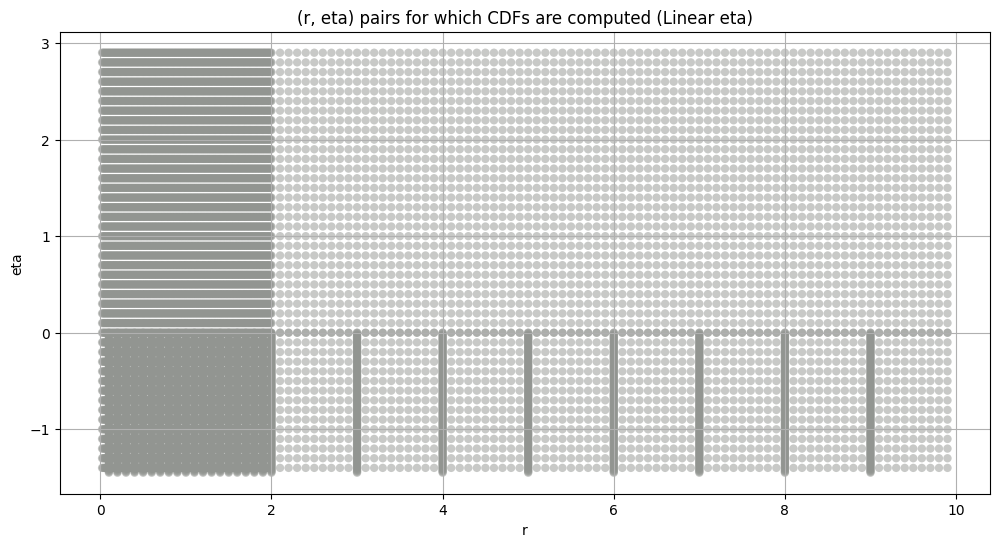

{(0.02,
  -1.4): <scipy.interpolate._fitpack2.InterpolatedUnivariateSpline at 0x1f004553d90>,
 (0.02,
  -1.3): <scipy.interpolate._fitpack2.InterpolatedUnivariateSpline at 0x1f048023950>,
 (0.02,
  -1.2): <scipy.interpolate._fitpack2.InterpolatedUnivariateSpline at 0x1f048023c10>,
 (0.02,
  -1.1): <scipy.interpolate._fitpack2.InterpolatedUnivariateSpline at 0x1f048023ed0>,
 (0.02,
  -1.0): <scipy.interpolate._fitpack2.InterpolatedUnivariateSpline at 0x1f04803c1d0>,
 (0.02,
  -0.9): <scipy.interpolate._fitpack2.InterpolatedUnivariateSpline at 0x1f04803c490>,
 (0.02,
  -0.8): <scipy.interpolate._fitpack2.InterpolatedUnivariateSpline at 0x1f04803c750>,
 (0.02,
  -0.7): <scipy.interpolate._fitpack2.InterpolatedUnivariateSpline at 0x1f04803ca90>,
 (0.02,
  -0.6): <scipy.interpolate._fitpack2.InterpolatedUnivariateSpline at 0x1f04803cdd0>,
 (0.02,
  -0.5): <scipy.interpolate._fitpack2.InterpolatedUnivariateSpline at 0x1f04803d190>,
 (0.02,
  -0.4): <scipy.interpolate._fitpack2.InterpolatedUn

In [12]:
temp_df = all_cdfs_df[(all_cdfs_df['eta'] < 3) & (all_cdfs_df['r'] < 10)]
create_scatter_plot(temp_df)
temp_df.shape
all_cdfs_df = temp_df
all_cdfs = {x[0] : x[1] for x in temp_df['(r,eta),cdf']}
all_cdfs

## Bootstrapping the Variance and Kurtosis

In [13]:
n_bootstrap = int(1e3)
bootstrap_size = int(1e3)
ci = 0.99

In [14]:
bootstrap_path = Path(os.path.join(CWD, "CSVs", f'initial_grid_bootstrap{n_bootstrap}_{bootstrap_size}_ci{ci}.csv'))
master_df_var_kurt_path = Path(os.path.join(CWD, "CSVs", f'initial_grid_bootstrap{n_bootstrap}_{bootstrap_size}_ci{ci}.csv'))

if RERUN or not master_df_var_kurt_path.exists():
    for group in GROUPS:
        print(f'{GROUP.capitalize()} {group}')
        obs_var, var_lower, var_upper, var_values_dict[group] = bootstrap_metric(group_data_map[group], 
                                                                                n_bootstrap=n_bootstrap, 
                                                                                bootstrap_size=min(group_data_map[group].size, bootstrap_size), 
                                                                                metric= np.var, 
                                                                                ci=ci)
        obs_kurt, kurt_lower, kurt_upper, kurt_values_dict[group] = bootstrap_metric(group_data_map[group], 
                                                                                    n_bootstrap=n_bootstrap, 
                                                                                    bootstrap_size=min(group_data_map[group].size, bootstrap_size), 
                                                                                    metric= stats.kurtosis, ci=ci)  
        master_df.loc[group, 'obs_var'], master_df.loc[group, 'var_lower'], master_df.loc[group, 'var_upper'] = obs_var, var_lower, var_upper
        master_df.loc[group, 'obs_kurt'], master_df.loc[group, 'kurt_lower'], master_df.loc[group, 'kurt_upper'] = obs_kurt, kurt_lower, kurt_upper
        master_df.loc[group, 'total_samples'] = group_total_samples[group]

    master_df.to_csv(os.path.join(CWD, "CSVs", f'initial_grid_bootstrap{n_bootstrap}_{bootstrap_size}_ci{ci}.csv'))

master_df = pd.read_csv(master_df_var_kurt_path, index_col=GROUP)
var_kurt_df = pd.read_csv(bootstrap_path, index_col=GROUP)
master_df

Scale 0.3162


100%|██████████| 1000/1000 [00:00<00:00, 1562.18it/s]


Scale 0.4833


100%|██████████| 1000/1000 [00:00<00:00, 1563.55it/s]


Scale 0.7071


100%|██████████| 1000/1000 [00:00<00:00, 1115.10it/s]


Scale 0.7386


100%|██████████| 1000/1000 [00:00<00:00, 1712.93it/s]


Scale 1


100%|██████████| 1000/1000 [00:00<00:00, 1439.33it/s]


Scale 1.129


100%|██████████| 1000/1000 [00:00<00:00, 1356.91it/s]


Scale 1.725


100%|██████████| 1000/1000 [00:00<00:00, 1481.14it/s]


Scale 2.637


100%|██████████| 1000/1000 [00:00<00:00, 1630.81it/s]


Scale 4.03


100%|██████████| 1000/1000 [00:00<00:00, 1716.42it/s]


Scale 6.158


100%|██████████| 1000/1000 [00:00<00:00, 2033.12it/s]


Scale 9.412


100%|██████████| 1000/1000 [00:00<00:00, 1373.20it/s]


Scale 14.38


100%|██████████| 1000/1000 [00:00<00:00, 1273.64it/s]


Scale 21.98


100%|██████████| 1000/1000 [00:00<00:00, 1251.77it/s]


Scale 33.6


100%|██████████| 1000/1000 [00:00<00:00, 1563.83it/s]


Scale 51.35


100%|██████████| 1000/1000 [00:00<00:00, 1430.42it/s]


Scale 78.48


100%|██████████| 1000/1000 [00:00<00:00, 1357.34it/s]


Scale 119.9


100%|██████████| 1000/1000 [00:00<00:00, 1378.61it/s]


Scale 183.3


100%|██████████| 1000/1000 [00:00<00:00, 1393.34it/s]


Scale 280.1


100%|██████████| 1000/1000 [00:01<00:00, 884.96it/s]


Scale 428.1


100%|██████████| 1000/1000 [00:00<00:00, 2522.99it/s]


Scale 654.3


100%|██████████| 1000/1000 [00:01<00:00, 877.42it/s]


Scale 1000.0


100%|██████████| 1000/1000 [00:00<00:00, 1103.90it/s]


obs_var    var_lower    var_upper  obs_kurt  kurt_lower  \
scale                                                                    
0.3162        0.790476     0.682967     0.922652  1.180593    0.331785   
0.4833        1.219052     1.049723     1.389108  1.170011    0.341924   
0.7071        1.766919     1.535066     2.032187  1.154426    0.374695   
0.7386        1.831360     1.607561     2.089132  1.174598    0.329283   
1.0000        2.510904     2.163976     2.883629  1.189316    0.333298   
1.1290        2.816910     2.419637     3.240292  1.134522    0.347329   
1.7250        4.293771     3.682135     4.922435  1.247803    0.329209   
2.6370        6.598141     5.703405     7.531285  1.204222    0.343955   
4.0300       10.133139     8.797777    11.538563  1.288081    0.351900   
6.1580       15.464858    13.285058    17.790633  1.130144    0.348468   
9.4120       23.246507    19.860002    26.594510  1.152443    0.324830   
14.3800      35.843058    31.199047    41.649831  1.126988    0.333474   
21.9800      54.995503    47.084300    63.013318  1.203045    0.317721   
33.6000      82.920489    70.735570    94.121590  1.188054    0.385546   
51.3500     127.792530   109.339894   147.477991  1.168185    0.350664   
78.4800     196.166613   168.059940   227.526662  1.118663    0.288004   
119.9000    300.211163   259.986421   346.465388  1.164514    0.293473   
183.3000    455.066067   394.947906   535.180819  1.183842    0.361975   
280.1000    693.192078   597.067980   793.714257  1.098701    0.355469   
428.1000   1065.216086   914.749578  1232.923317  1.138999    0.321895   
654.3000   1623.127532  1394.604121  1872.070145  1.126099    0.310972   
1000.0000  2519.167344  2183.680883  2891.181094  1.217184    0.390257   

           kurt_upper  total_samples  
scale                                 
0.3162       2.699540       100000.0  
0.4833       2.429173       100000.0  
0.7071       2.244440       100000.0  
0.7386       3.498762       100000.0  
1.0000       2.563086       100000.0  
1.1290       3.525764       100000.0  
1.7250       2.513266       100000.0  
2.6370       3.311856       100000.0  
4.0300       5.224419       100000.0  
6.1580       3.757000       100000.0  
9.4120       2.520646       100000.0  
14.3800      2.426455       100000.0  
21.9800      2.708552       100000.0  
33.6000      2.650974       100000.0  
51.3500      3.661705       100000.0  
78.4800      2.742142       100000.0  
119.9000     2.534281       100000.0  
183.3000     2.736602       100000.0  
280.1000     2.332704       100000.0  
428.1000     2.455563       100000.0  
654.3000     3.272933       100000.0  
1000.0000    3.951625       100000.0

## Initial Grid Search and Hypothesis Test Plots

####
Scale  0.3162


100%|██████████| 15868/15868 [03:43<00:00, 71.03it/s] 


Finding Minimum after computing 15868 CDFs
Number of samples: 100000, Without approximation : 100000.0


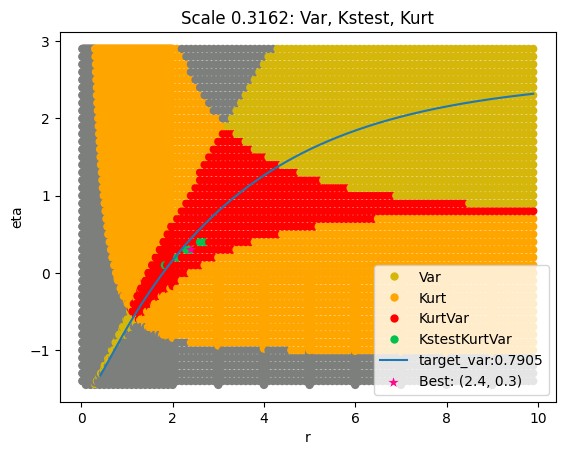

####
Scale  0.4833


100%|██████████| 15868/15868 [03:46<00:00, 70.21it/s] 


Finding Minimum after computing 15868 CDFs
Number of samples: 100000, Without approximation : 100000.0


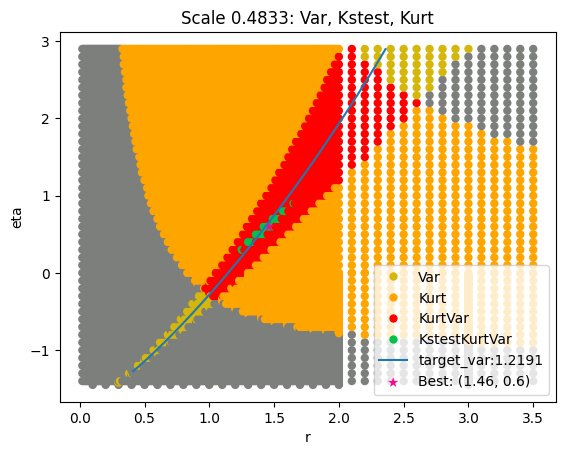

####
Scale  0.7071


100%|██████████| 15868/15868 [03:34<00:00, 73.88it/s] 


Finding Minimum after computing 15868 CDFs
Number of samples: 100000, Without approximation : 100000.0


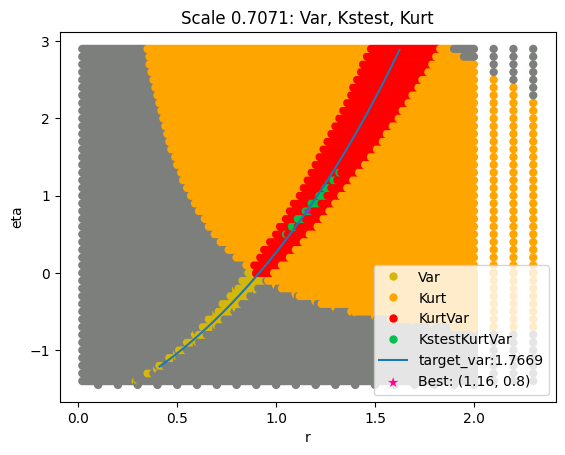

####
Scale  0.7386


100%|██████████| 15868/15868 [03:38<00:00, 72.49it/s] 


Finding Minimum after computing 15868 CDFs
Number of samples: 100000, Without approximation : 100000.0


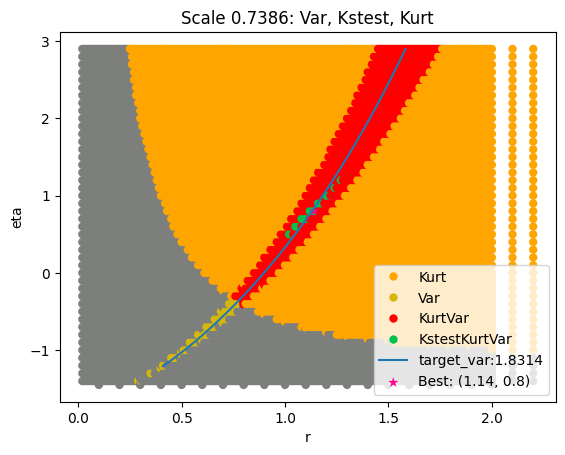

####
Scale  1


100%|██████████| 15868/15868 [03:24<00:00, 77.56it/s] 


Finding Minimum after computing 15868 CDFs
Number of samples: 100000, Without approximation : 100000.0


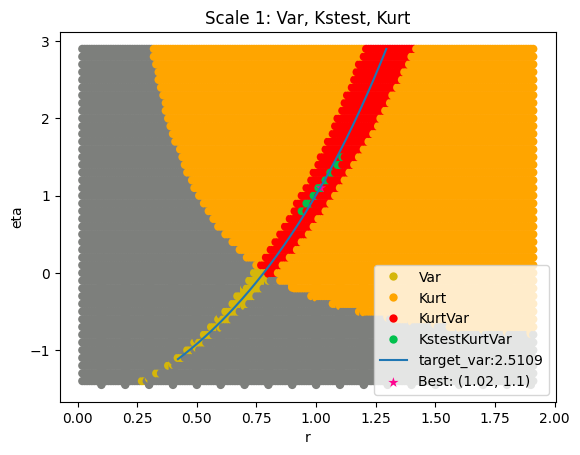

####
Scale  1.129


100%|██████████| 15868/15868 [03:12<00:00, 82.27it/s] 


Finding Minimum after computing 15868 CDFs
Number of samples: 100000, Without approximation : 100000.0


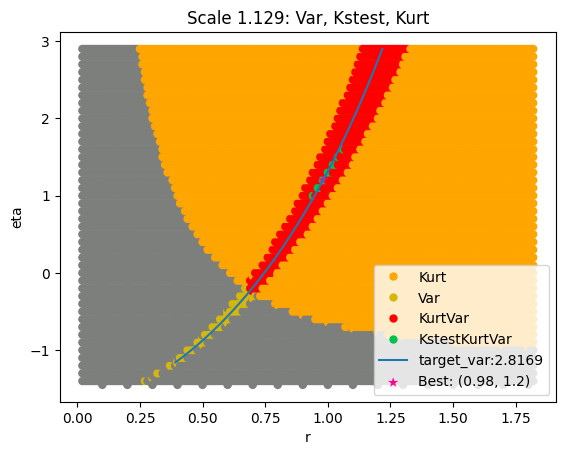

####
Scale  1.725


100%|██████████| 15868/15868 [03:08<00:00, 83.97it/s] 


Finding Minimum after computing 15868 CDFs
Number of samples: 100000, Without approximation : 100000.0


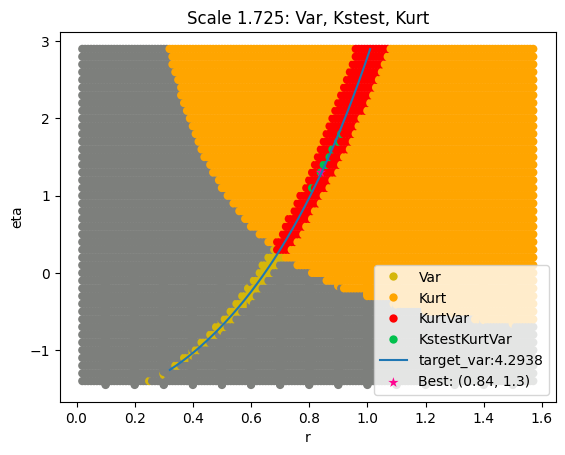

####
Scale  2.637


100%|██████████| 15868/15868 [03:14<00:00, 81.45it/s] 


Finding Minimum after computing 15868 CDFs
Number of samples: 100000, Without approximation : 100000.0


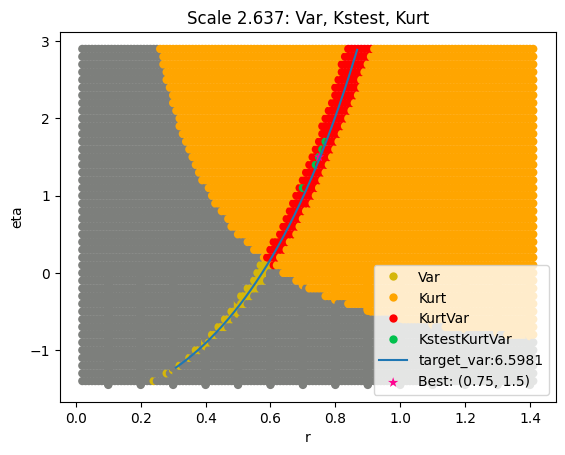

####
Scale  4.03


100%|██████████| 15868/15868 [03:14<00:00, 81.58it/s] 


Finding Minimum after computing 15868 CDFs
Number of samples: 100000, Without approximation : 100000.0


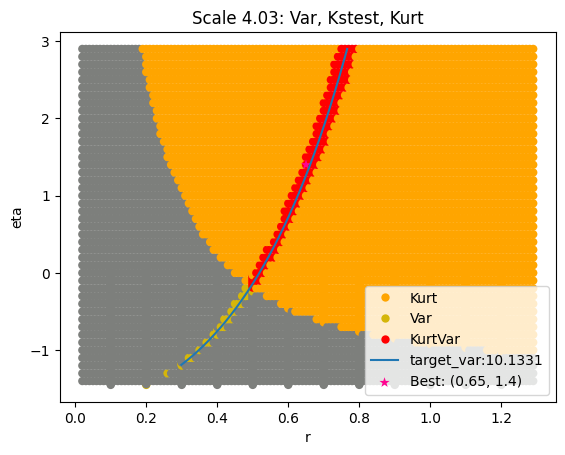

####
Scale  6.158


100%|██████████| 15868/15868 [03:15<00:00, 81.26it/s] 


Finding Minimum after computing 15868 CDFs
Number of samples: 100000, Without approximation : 100000.0


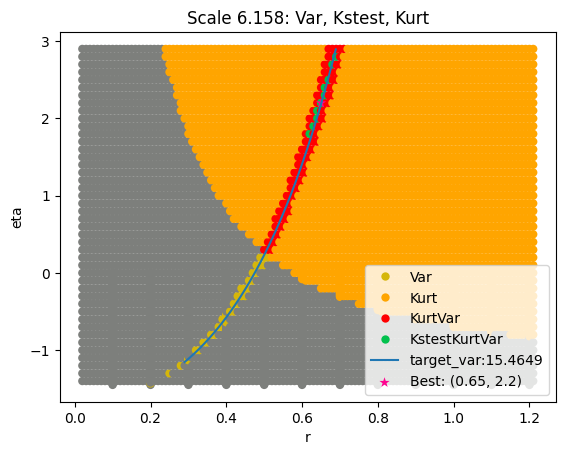

####
Scale  9.412


100%|██████████| 15868/15868 [03:12<00:00, 82.59it/s] 


Finding Minimum after computing 15868 CDFs
Number of samples: 100000, Without approximation : 100000.0


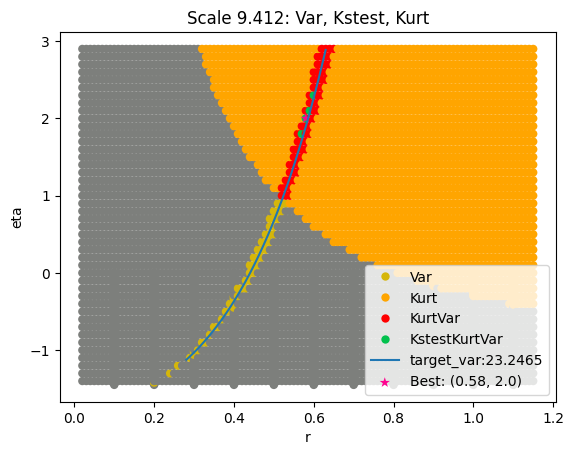

####
Scale  14.38


100%|██████████| 15868/15868 [03:09<00:00, 83.79it/s] 


Finding Minimum after computing 15868 CDFs
Number of samples: 100000, Without approximation : 100000.0


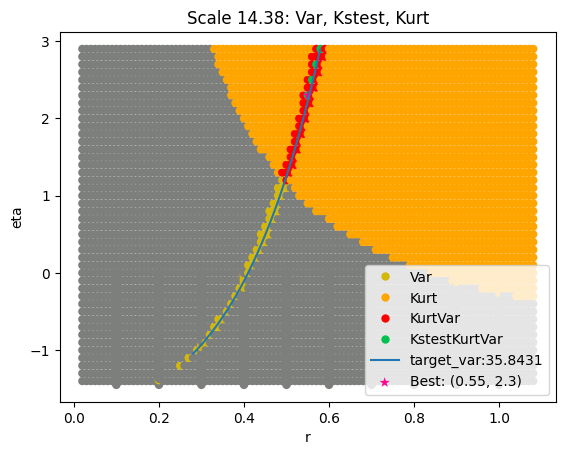

####
Scale  21.98


100%|██████████| 15868/15868 [03:11<00:00, 82.89it/s] 


Finding Minimum after computing 15868 CDFs
Number of samples: 100000, Without approximation : 100000.0


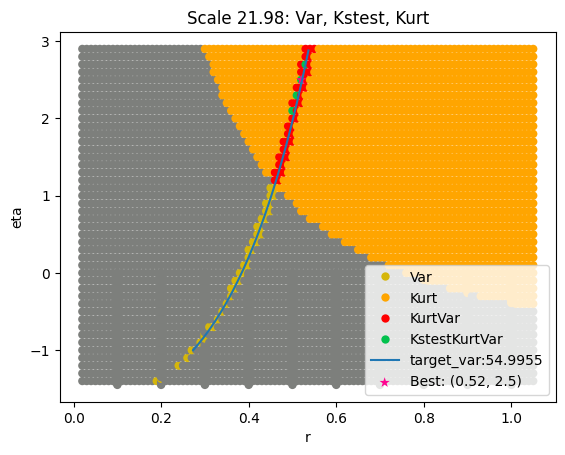

####
Scale  33.6


100%|██████████| 15868/15868 [03:10<00:00, 83.30it/s] 


Finding Minimum after computing 15868 CDFs
Number of samples: 100000, Without approximation : 100000.0


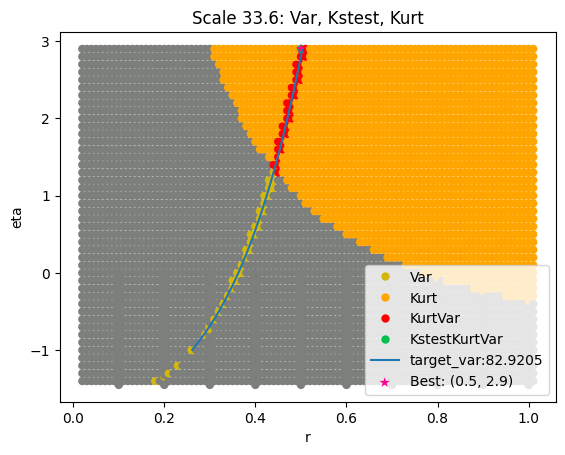

####
Scale  51.35


100%|██████████| 15868/15868 [03:09<00:00, 83.62it/s] 


Finding Minimum after computing 15868 CDFs
Number of samples: 100000, Without approximation : 100000.0


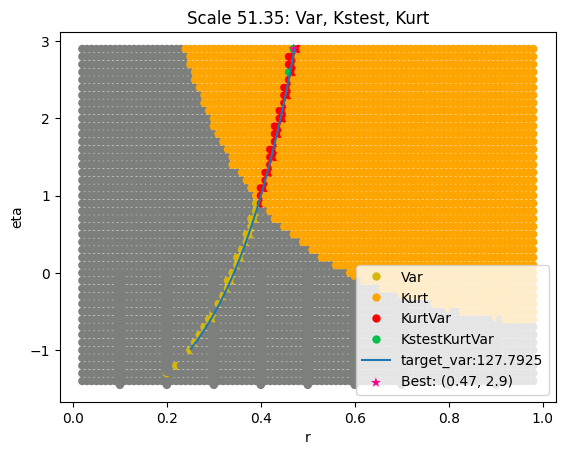

####
Scale  78.48


100%|██████████| 15868/15868 [03:16<00:00, 80.75it/s] 


Finding Minimum after computing 15868 CDFs
Number of samples: 100000, Without approximation : 100000.0


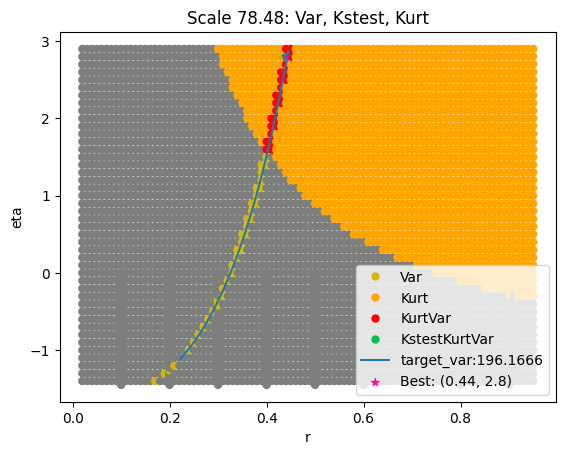

####
Scale  119.9


100%|██████████| 15868/15868 [03:08<00:00, 84.02it/s] 


Finding Minimum after computing 15868 CDFs
Number of samples: 100000, Without approximation : 100000.0


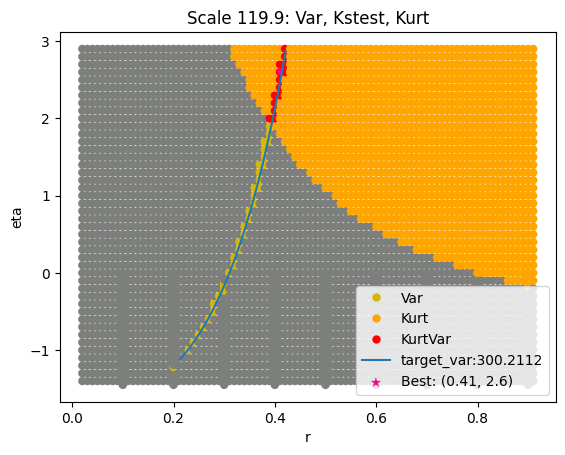

####
Scale  183.3


100%|██████████| 15868/15868 [03:09<00:00, 83.56it/s] 


Finding Minimum after computing 15868 CDFs
Number of samples: 100000, Without approximation : 100000.0


c:\Users\yashd\Desktop\hierarchical-bayesian-model-validation\utilities\testing.py:848: RuntimeWarning: invalid value encountered in scalar divide
  return scipy.special.gamma((eta+2.5)/r) / scipy.special.gamma((eta+1.5)/r)


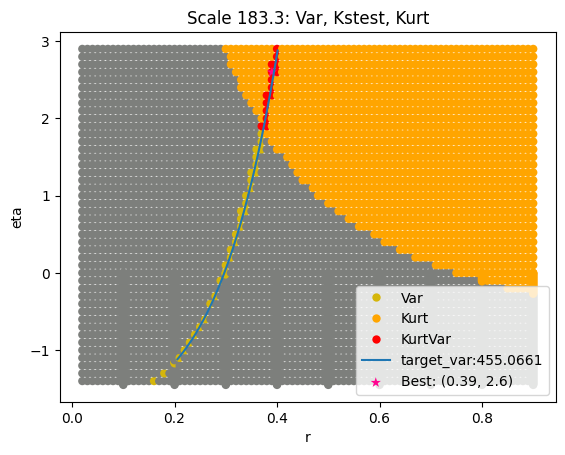

####
Scale  280.1


100%|██████████| 15868/15868 [35:54<00:00,  7.37it/s]   


Finding Minimum after computing 15868 CDFs
Number of samples: 100000, Without approximation : 100000.0


c:\Users\yashd\Desktop\hierarchical-bayesian-model-validation\utilities\testing.py:848: RuntimeWarning: invalid value encountered in scalar divide
  return scipy.special.gamma((eta+2.5)/r) / scipy.special.gamma((eta+1.5)/r)


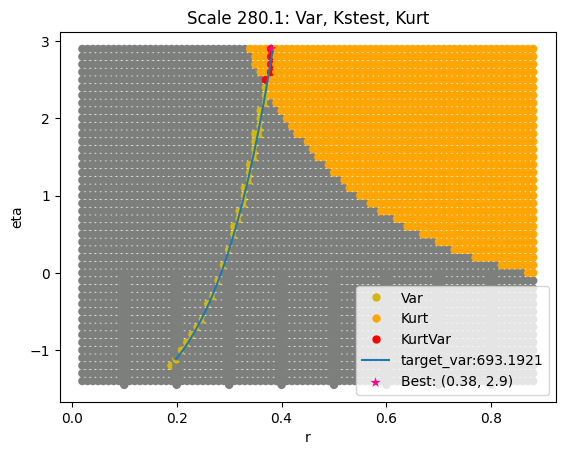

####
Scale  428.1


100%|██████████| 15868/15868 [03:14<00:00, 81.42it/s] 


Finding Minimum after computing 15868 CDFs
Number of samples: 100000, Without approximation : 100000.0


c:\Users\yashd\Desktop\hierarchical-bayesian-model-validation\utilities\testing.py:848: RuntimeWarning: invalid value encountered in scalar divide
  return scipy.special.gamma((eta+2.5)/r) / scipy.special.gamma((eta+1.5)/r)


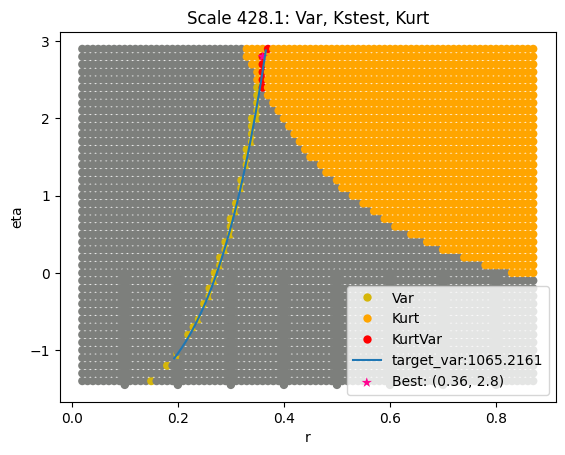

####
Scale  654.3


100%|██████████| 15868/15868 [03:13<00:00, 82.14it/s] 


Finding Minimum after computing 15868 CDFs
Number of samples: 100000, Without approximation : 100000.0


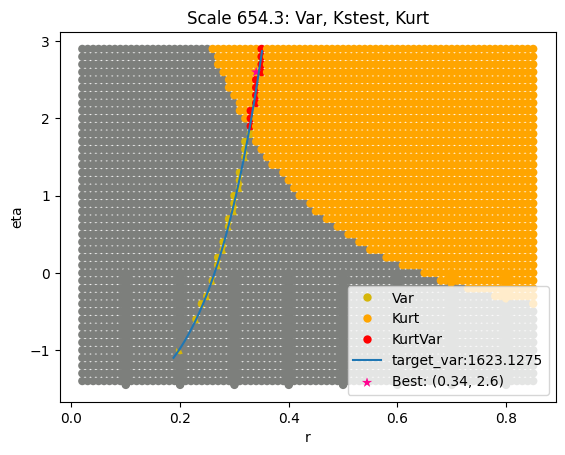

####
Scale  1000.0


100%|██████████| 15868/15868 [04:32<00:00, 58.32it/s]


Finding Minimum after computing 15868 CDFs
Number of samples: 100000, Without approximation : 100000.0


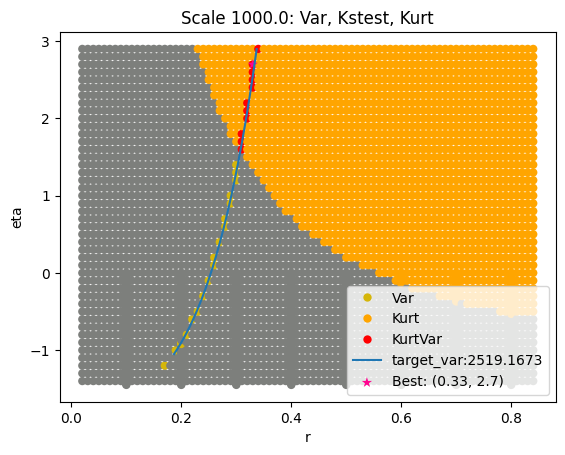

obs_var    var_lower    var_upper  obs_kurt  kurt_lower  \
scale                                                                    
0.3162        0.790476     0.682967     0.922652  1.180593    0.331785   
0.4833        1.219052     1.049723     1.389108  1.170011    0.341924   
0.7071        1.766919     1.535066     2.032187  1.154426    0.374695   
0.7386        1.831360     1.607561     2.089132  1.174598    0.329283   
1.0000        2.510904     2.163976     2.883629  1.189316    0.333298   
1.1290        2.816910     2.419637     3.240292  1.134522    0.347329   
1.7250        4.293771     3.682135     4.922435  1.247803    0.329209   
2.6370        6.598141     5.703405     7.531285  1.204222    0.343955   
4.0300       10.133139     8.797777    11.538563  1.288081    0.351900   
6.1580       15.464858    13.285058    17.790633  1.130144    0.348468   
9.4120       23.246507    19.860002    26.594510  1.152443    0.324830   
14.3800      35.843058    31.199047    41.649831  1.126988    0.333474   
21.9800      54.995503    47.084300    63.013318  1.203045    0.317721   
33.6000      82.920489    70.735570    94.121590  1.188054    0.385546   
51.3500     127.792530   109.339894   147.477991  1.168185    0.350664   
78.4800     196.166613   168.059940   227.526662  1.118663    0.288004   
119.9000    300.211163   259.986421   346.465388  1.164514    0.293473   
183.3000    455.066067   394.947906   535.180819  1.183842    0.361975   
280.1000    693.192078   597.067980   793.714257  1.098701    0.355469   
428.1000   1065.216086   914.749578  1232.923317  1.138999    0.321895   
654.3000   1623.127532  1394.604121  1872.070145  1.126099    0.310972   
1000.0000  2519.167344  2183.680883  2891.181094  1.217184    0.390257   

           kurt_upper  total_samples  initial_r  initial_eta  \
scale                                                          
0.3162       2.699540       100000.0       2.40          0.3   
0.4833       2.429173       100000.0       1.46          0.6   
0.7071       2.244440       100000.0       1.16          0.8   
0.7386       3.498762       100000.0       1.14          0.8   
1.0000       2.563086       100000.0       1.02          1.1   
1.1290       3.525764       100000.0       0.98          1.2   
1.7250       2.513266       100000.0       0.84          1.3   
2.6370       3.311856       100000.0       0.75          1.5   
4.0300       5.224419       100000.0       0.65          1.4   
6.1580       3.757000       100000.0       0.65          2.2   
9.4120       2.520646       100000.0       0.58          2.0   
14.3800      2.426455       100000.0       0.55          2.3   
21.9800      2.708552       100000.0       0.52          2.5   
33.6000      2.650974       100000.0       0.50          2.9   
51.3500      3.661705       100000.0       0.47          2.9   
78.4800      2.742142       100000.0       0.44          2.8   
119.9000     2.534281       100000.0       0.41          2.6   
183.3000     2.736602       100000.0       0.39          2.6   
280.1000     2.332704       100000.0       0.38          2.9   
428.1000     2.455563       100000.0       0.36          2.8   
654.3000     3.272933       100000.0       0.34          2.6   
1000.0000    3.951625       100000.0       0.33          2.7   

           kstest_stat_initial  kstest_stat_cutoff_0.05  
scale                                                    
0.3162                0.003230                 0.004293  
0.4833                0.001917                 0.004293  
0.7071                0.001966                 0.004293  
0.7386                0.002405                 0.004293  
1.0000                0.002420                 0.004293  
1.1290                0.002995                 0.004293  
1.7250                0.002637                 0.004293  
2.6370                0.002127                 0.004293  
4.0300                0.005620                 0.004293  
6.1580                0.001714                 0.004293  
9.412

In [15]:
master_df_combo_path = Path(os.path.join(CWD, "CSVs", "master_df_combo.csv"))

if RERUN or not master_df_combo_path.exists():
    sorted_params = sorted(all_cdfs)
    group_cdf_df_dict = dict()
    ksstats_dict = dict()

    for i, group in enumerate(GROUPS):
        print(f"####\n{GROUP.capitalize()} ", group)
        sample = group_data_map[group]
        group_cdf_df = all_cdfs_df.copy()
        ksstats, initial_param, min_stat = gridsearch(sample, all_cdfs, debug=True)
        master_df.loc[group, 'initial_r'], master_df.loc[group, 'initial_eta'] = initial_param
        print(f"Number of samples: {sample.size}, Without approximation : {master_df.loc[group, 'total_samples']}")
        master_df.loc[group, 'kstest_stat_initial'] = min_stat
        cutoff = stats.kstwo(n=master_df.loc[group, 'total_samples']).isf(0.05)
        master_df.loc[group, 'kstest_stat_cutoff_0.05'] = cutoff

        group_cdf_df = add_tests_to_df(cdfs_df = group_cdf_df, group = group, var_kurt_df = master_df, ksstats = ksstats)
        group_cdf_df_dict[group] = group_cdf_df
        cols = ['pass_var', 'pass_kstest', 'pass_kurt']

        fig = combo_test_plot(group_cdf_df_dict[group], cols, 
                            plot_name=f"{GROUP.capitalize()} {group}: {', '.join([col[5:].capitalize() for col in cols])}", 
                            target_var = master_df.loc[group, 'obs_var'],
                            best_param = initial_param)
        
        fig.figure.savefig(os.path.join(CWD, "plots", f"full_grid_search_combo_plot_layer{group}.jpg"), bbox_inches = 'tight', dpi=600)

        # Optional: Create plots of bootstrapped variance and kurtosis for varying confidence intervals
        # fig_var = create_ci_scatter_plot(group_cdf_df_dict[group], var_values_dict, metric='variance', group=group)
        # fig_kurt = create_ci_scatter_plot(group_cdf_df_dict[group], kurt_values_dict, metric='kurtosis', group=group)

        # fig_var.savefig(os.path.join(CWD, "plots", f"ci_scatter_variance_{GROUP}_{group}_bootstrap{n_bootstrap}.jpg"), bbox_inches='tight')
        # plt.close(fig_var)
        # fig_kurt.savefig(os.path.join(CWD, "plots", f"ci_scatter_variance_{GROUP}_{group}_bootstrap{n_bootstrap}.jpg"), bbox_inches='tight')
        # plt.close(fig_kurt)

    master_df.to_csv(os.path.join(CWD, "CSVs", "master_df_combo.csv"))

master_df = pd.read_csv(master_df_combo_path, index_col=GROUP)
master_df

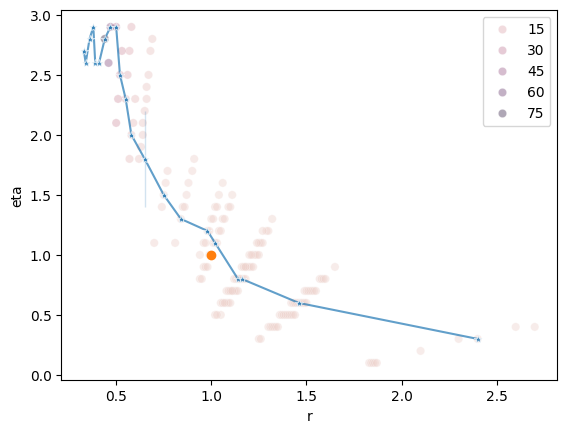

In [27]:
group_dfs = []
for scale, df in group_cdf_df_dict.items():
    df['scale'] = scale
    group_dfs.append(df)

laplace_df = pd.concat([df[df['pass_kstest'] == True] for df in group_dfs], axis=0)
sns.scatterplot(data = laplace_df, x = 'r', y = 'eta', hue = 'scale', alpha=0.4)
sns.lineplot(data = master_df, x = 'initial_r', y = 'initial_eta', marker="*", alpha=0.7)
plt.scatter(1, 1)

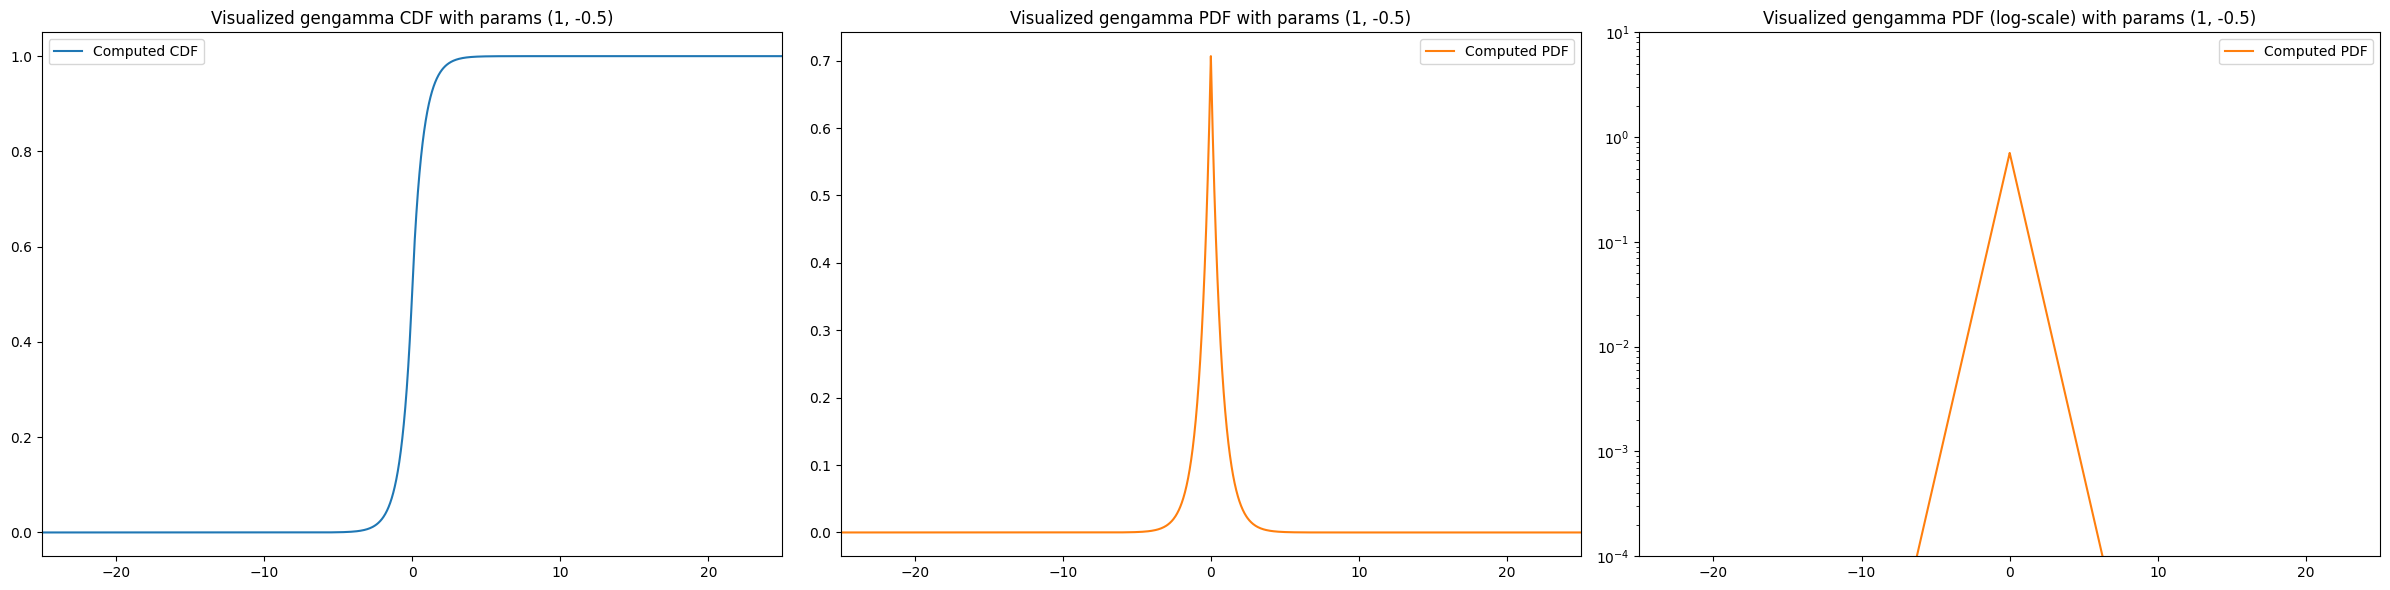

In [17]:
visualize_cdf_pdf((1, -0.5));

### Search over $\eta=0$

In [18]:
master_df_eta0_path = Path(os.path.join(CWD, "CSVs", "master_df_eta0.csv"))

if RERUN or not master_df_eta0_path.exists():
    best_params_eta0 = []
    for i, group in enumerate(GROUPS):
        if master_df.loc[group, 'initial_eta'] != 0:
            sample = group_data_map[group]
            group_cdf = all_cdfs_df[all_cdfs_df['eta'] == 0]
            cdfs_dict = {i[0]:i[1] for i in group_cdf['(r,eta),cdf']}
            ksstats, best_param_eta0, kstest_stat_eta0 = gridsearch(sample, cdfs_dict, debug=True)
            master_df.loc[group, 'best_r_eta0'] = best_param_eta0[0]
            master_df.loc[group, 'kstest_stat_eta0'] = kstest_stat_eta0
        else:
            master_df.loc[group, 'kstest_stat_eta0'] = master_df.loc[group, 'kstest_stat_initial']
            master_df.loc[group, 'best_r_eta0'] = master_df.loc[group, 'initial_r']
    master_df.to_csv(os.path.join(CWD, "CSVs", "master_df_eta0.csv"))

master_df = pd.read_csv(master_df_eta0_path, index_col=GROUP)
master_df

  0%|          | 0/278 [00:00<?, ?it/s]

100%|██████████| 278/278 [00:06<00:00, 43.44it/s]


Finding Minimum after computing 278 CDFs


100%|██████████| 278/278 [00:05<00:00, 54.14it/s]


Finding Minimum after computing 278 CDFs


100%|██████████| 278/278 [00:07<00:00, 35.65it/s]


Finding Minimum after computing 278 CDFs


100%|██████████| 278/278 [00:05<00:00, 54.66it/s]


Finding Minimum after computing 278 CDFs


100%|██████████| 278/278 [00:05<00:00, 53.80it/s]


Finding Minimum after computing 278 CDFs


100%|██████████| 278/278 [00:07<00:00, 37.15it/s]


Finding Minimum after computing 278 CDFs


100%|██████████| 278/278 [00:06<00:00, 45.02it/s]


Finding Minimum after computing 278 CDFs


100%|██████████| 278/278 [00:07<00:00, 36.69it/s]


Finding Minimum after computing 278 CDFs


100%|██████████| 278/278 [00:06<00:00, 43.66it/s]


Finding Minimum after computing 278 CDFs


100%|██████████| 278/278 [00:07<00:00, 37.78it/s]


Finding Minimum after computing 278 CDFs


100%|██████████| 278/278 [00:05<00:00, 53.43it/s]


Finding Minimum after computing 278 CDFs


100%|██████████| 278/278 [00:05<00:00, 54.50it/s]


Finding Minimum after computing 278 CDFs


100%|██████████| 278/278 [00:05<00:00, 51.42it/s]


Finding Minimum after computing 278 CDFs


100%|██████████| 278/278 [00:05<00:00, 52.87it/s]


Finding Minimum after computing 278 CDFs


100%|██████████| 278/278 [00:06<00:00, 41.31it/s]


Finding Minimum after computing 278 CDFs


100%|██████████| 278/278 [00:05<00:00, 50.25it/s]


Finding Minimum after computing 278 CDFs


100%|██████████| 278/278 [00:06<00:00, 41.78it/s]


Finding Minimum after computing 278 CDFs


100%|██████████| 278/278 [00:06<00:00, 42.38it/s]


Finding Minimum after computing 278 CDFs


100%|██████████| 278/278 [00:06<00:00, 42.12it/s]


Finding Minimum after computing 278 CDFs


100%|██████████| 278/278 [00:05<00:00, 47.22it/s]


Finding Minimum after computing 278 CDFs


100%|██████████| 278/278 [00:05<00:00, 49.44it/s]


Finding Minimum after computing 278 CDFs


100%|██████████| 278/278 [00:05<00:00, 51.91it/s]


Finding Minimum after computing 278 CDFs


obs_var    var_lower    var_upper  obs_kurt  kurt_lower  \
scale                                                                    
0.3162        0.790476     0.682967     0.922652  1.180593    0.331785   
0.4833        1.219052     1.049723     1.389108  1.170011    0.341924   
0.7071        1.766919     1.535066     2.032187  1.154426    0.374695   
0.7386        1.831360     1.607561     2.089132  1.174598    0.329283   
1.0000        2.510904     2.163976     2.883629  1.189316    0.333298   
1.1290        2.816910     2.419637     3.240292  1.134522    0.347329   
1.7250        4.293771     3.682135     4.922435  1.247803    0.329209   
2.6370        6.598141     5.703405     7.531285  1.204222    0.343955   
4.0300       10.133139     8.797777    11.538563  1.288081    0.351900   
6.1580       15.464858    13.285058    17.790633  1.130144    0.348468   
9.4120       23.246507    19.860002    26.594510  1.152443    0.324830   
14.3800      35.843058    31.199047    41.649831  1.126988    0.333474   
21.9800      54.995503    47.084300    63.013318  1.203045    0.317721   
33.6000      82.920489    70.735570    94.121590  1.188054    0.385546   
51.3500     127.792530   109.339894   147.477991  1.168185    0.350664   
78.4800     196.166613   168.059940   227.526662  1.118663    0.288004   
119.9000    300.211163   259.986421   346.465388  1.164514    0.293473   
183.3000    455.066067   394.947906   535.180819  1.183842    0.361975   
280.1000    693.192078   597.067980   793.714257  1.098701    0.355469   
428.1000   1065.216086   914.749578  1232.923317  1.138999    0.321895   
654.3000   1623.127532  1394.604121  1872.070145  1.126099    0.310972   
1000.0000  2519.167344  2183.680883  2891.181094  1.217184    0.390257   

           kurt_upper  total_samples  initial_r  initial_eta  \
scale                                                          
0.3162       2.699540       100000.0       2.40          0.3   
0.4833       2.429173       100000.0       1.46          0.6   
0.7071       2.244440       100000.0       1.16          0.8   
0.7386       3.498762       100000.0       1.14          0.8   
1.0000       2.563086       100000.0       1.02          1.1   
1.1290       3.525764       100000.0       0.98          1.2   
1.7250       2.513266       100000.0       0.84          1.3   
2.6370       3.311856       100000.0       0.75          1.5   
4.0300       5.224419       100000.0       0.65          1.4   
6.1580       3.757000       100000.0       0.65          2.2   
9.4120       2.520646       100000.0       0.58          2.0   
14.3800      2.426455       100000.0       0.55          2.3   
21.9800      2.708552       100000.0       0.52          2.5   
33.6000      2.650974       100000.0       0.50          2.9   
51.3500      3.661705       100000.0       0.47          2.9   
78.4800      2.742142       100000.0       0.44          2.8   
119.9000     2.534281       100000.0       0.41          2.6   
183.3000     2.736602       100000.0       0.39          2.6   
280.1000     2.332704       100000.0       0.38          2.9   
428.1000     2.455563       100000.0       0.36          2.8   
654.3000     3.272933       100000.0       0.34          2.6   
1000.0000    3.951625       100000.0       0.33          2.7   

           kstest_stat_initial  kstest_stat_cutoff_0.05  best_r_eta0  \
scale                                                                  
0.3162                0.003230                 0.004293         1.66   
0.4833                0.001917                 0.004293         1.06   
0.7071                0.001966                 0.004293         0.84   
0.7386                0.002405                 0.004293         0.83   
1.0000                0.002420                 0.004293         0.72   
1.1290                0.002995                 0.004293         0.69   
1.7250                0.002637                 0.004293         0.60   
2.6370                0.002127                 0.0042

## Optimization

In [19]:
def simple_add_cdfs(r_range, eta_range, dir, folder_name = '', n_samples = 500, tail_bound = 0.01, tail_percent = 0.1, enforce_assert=True, return_assert = False, debug=False):

    if folder_name == '':
        folder_name = f'r{round_to_sigfigs(min(r_range))}to{round_to_sigfigs(max(r_range))}_eta{round_to_sigfigs(min(eta_range))}to{round_to_sigfigs(max(eta_range))}'

    FOLDER_PATH = os.path.join(dir, folder_name)

    if os.path.isdir(FOLDER_PATH):
        cdfs_completed = combine_pickles(FOLDER_PATH)
        if debug:
            print("CDFs completed:", len(cdfs_completed))
    else:
        Path(os.path.join(os.getcwd(), FOLDER_PATH)).mkdir()
        cdfs_completed = dict()

    n = len(r_range)*len(eta_range)
    finished = len(cdfs_completed)
    cnt = len(cdfs_completed)
    for r in r_range:
        r_cdf = dict()
        r = round_to_sigfigs(r)
        for eta in eta_range:
            eta = round_to_sigfigs(eta)
            if ((r, eta) in cdfs_completed) and cdfs_completed[(r, eta)]:
                continue
            cnt += 1
            if debug:
                print(f'{(r, eta)}, {cnt} of {n + finished}')
            if cnt % 50 == 0:
                print(f'{(r, eta)}, {cnt} of {n + finished}')

            computed_cdf = compute_prior_cdf(r = r, eta = eta, method = 'gamma_cdf', n_samples = n_samples, tail_percent = tail_percent, tail_bound = tail_bound, 
                                             enforce_assert=enforce_assert, return_assert=return_assert, debug=debug)
            r_cdf[(r, eta)] = computed_cdf
        if r_cdf:
            sorted_r_cdf = [i[1] for i in sorted(r_cdf)]
            min_eta, max_eta = round_to_sigfigs(min(sorted_r_cdf), 6), round_to_sigfigs(max(sorted_r_cdf), 6)
            pkl_path = os.path.join(FOLDER_PATH, f'r{r}_eta{min_eta}to{max_eta}.pickle')
            pd.to_pickle(r_cdf, pkl_path)
        else:
            if debug:
                print(f"Skipped {r} entirely")

    if debug:
        print(f'You can find the CDFs here: {os.path.join(os.getcwd(), FOLDER_PATH)}')

In [20]:
master_df_optimized_path = Path(os.path.join(CWD, "CSVs", 'master_df_optimized.csv'))
rEtaKsstats_dict_path = Path(os.path.join(CWD, "cache", "rEtaKsstats_dict.pickle"))


SKIP_OPTIMIZE_STEP = True
NUM_ITERS = dict(zip(GROUPS, [1]*len(GROUPS)))
NUM_SAMPLES_OPTIMIZE = 2000

if RERUN or not master_df_optimized_path.exists():
    rEtaKsstats_dict = dict()

    if SKIP_OPTIMIZE_STEP:
        master_df['kstest_stat_best'] = master_df['kstest_stat_initial']
        master_df[f'best_r'] = master_df['initial_r']
        master_df[f'best_eta'] = master_df['initial_eta']
    else:
        for group in GROUPS: 
            print(f"{GROUP.capitalize()} {group}")
            sample = group_data_map[group]
            initial_r, initial_eta = master_df.loc[group, 'initial_r'], master_df.loc[group, f'initial_eta']
            r_granularity = 10
            eta_granularity = 10
            for i in range(0, -5, -1):
                if tuple([round_to_sigfigs(initial_r + 10.**i, 8), initial_eta]) in all_cdfs:
                    r_granularity = 10.**i
                if tuple([initial_r, round_to_sigfigs(initial_eta + 10.**i, 8)]) in all_cdfs:
                    
                    eta_granularity = 10.**i

            for d in range(1, NUM_ITERS[group] + 1):
                if d == 1:
                    initial_r, initial_eta = master_df.loc[group, 'initial_r'], master_df.loc[group, f'initial_eta']
                else:
                    initial_r, initial_eta = master_df.loc[group, f'iter{d - 1}_r'], master_df.loc[group, f'iter{d - 1}_eta']
                r_granularity = r_granularity * 10.0**(-d+1) 
                eta_granularity = eta_granularity * 10.0**(-d+1) 

                r_range = [round_to_sigfigs(x) for x in np.arange(initial_r - r_granularity, initial_r + r_granularity, r_granularity/10)]
                eta_range = [round_to_sigfigs(x) for x in np.arange(initial_eta - eta_granularity, initial_eta + eta_granularity, eta_granularity/10)]
                simple_add_cdfs(r_range, eta_range, dir = os.path.join(CWD, "groupCDFs"), folder_name=f'{GROUP}{group}', n_samples = NUM_SAMPLES_OPTIMIZE, debug=False, tail_bound=1e-5)
                cdfs_dict = combine_pickles(os.path.join(CWD, "groupCDFs", f'{GROUP}{group}'))
                ksstats, best_param, kstest_stat = gridsearch(sample, cdfs_dict, debug=True)

                temp_df = create_kurt_var_ksstat_df(cdfs_dict)
                temp_df = add_tests_to_df(cdfs_df=temp_df, group=group, var_kurt_df=master_df, ksstats=ksstats)
                
                group_cdf_df_dict[group] = pd.concat([group_cdf_df_dict[group], temp_df])
                master_df.loc[group, 'best_r'], master_df.loc[group, f'best_eta'] = best_param[0], best_param[1]
                master_df.loc[group, 'kstest_stat_best'] = kstest_stat
                master_df.loc[group, f'iter{d}_r'], master_df.loc[group, f'iter{d}_eta'] = best_param[0], best_param[1]
                master_df.loc[group, f'kstest_stat_iter{d}'] = kstest_stat
                
                print(f"Iter {d} {GROUP} {group} best parameters: {best_param, master_df.loc[group, f'kstest_stat_iter{d}']}")

            temp_df = group_cdf_df_dict[group].sort_values(['r', 'eta'])
            rEtaKsstats_dict[group] = [temp_df['r'], temp_df['eta'], temp_df['ksstat']]

            eps = 0.1
            filtered_df = temp_df[(temp_df['r'] > master_df.loc[group, 'initial_r'] - eps) & 
                            (temp_df['r'] < master_df.loc[group, 'initial_r'] + eps) &
                            (temp_df['eta'] > master_df.loc[group, 'initial_eta'] - eps) &
                            (temp_df['eta'] < master_df.loc[group, 'initial_eta'] + eps)]
            cols = ['pass_var', 'pass_kstest', 'pass_kurt']
            fig = combo_test_plot(filtered_df, cols, 
                                plot_name=f"{GROUP.capitalize()} {group} zoomed in: {', '.join([col[5:].capitalize() for col in cols])}",
                                best_param=(master_df.loc[group, 'best_r'], master_df.loc[group, f'best_eta']))
            fig.figure.savefig(os.path.join(CWD, "plots", f"optimized_full_grid_search_combo_plot_layer{group}.jpg"), bbox_inches = 'tight', dpi=600)
            
    master_df['n_pval_0.05'] = master_df.apply(lambda row : find_n_fixed_pval_stat(row.loc['kstest_stat_best'], row.loc['total_samples']), axis = 1)    
    master_df[['total_samples', 'initial_r', 'initial_eta', 'kstest_stat_initial', 'best_r', 'best_eta', 'kstest_stat_best', 'n_pval_0.05']].to_csv(os.path.join(CWD, "CSVs", 'optimized_params.csv'))
    master_df.to_csv(os.path.join(CWD, "CSVs", 'master_df_optimized.csv'))
    pd.to_pickle(rEtaKsstats_dict, os.path.join(CWD, "cache", 'rEtaKsstats_dict.pickle'))

master_df = pd.read_csv(master_df_optimized_path, index_col = GROUP)
master_df

obs_var    var_lower    var_upper  obs_kurt  kurt_lower  \
scale                                                                    
0.3162        0.790476     0.682967     0.922652  1.180593    0.331785   
0.4833        1.219052     1.049723     1.389108  1.170011    0.341924   
0.7071        1.766919     1.535066     2.032187  1.154426    0.374695   
0.7386        1.831360     1.607561     2.089132  1.174598    0.329283   
1.0000        2.510904     2.163976     2.883629  1.189316    0.333298   
1.1290        2.816910     2.419637     3.240292  1.134522    0.347329   
1.7250        4.293771     3.682135     4.922435  1.247803    0.329209   
2.6370        6.598141     5.703405     7.531285  1.204222    0.343955   
4.0300       10.133139     8.797777    11.538563  1.288081    0.351900   
6.1580       15.464858    13.285058    17.790633  1.130144    0.348468   
9.4120       23.246507    19.860002    26.594510  1.152443    0.324830   
14.3800      35.843058    31.199047    41.649831  1.126988    0.333474   
21.9800      54.995503    47.084300    63.013318  1.203045    0.317721   
33.6000      82.920489    70.735570    94.121590  1.188054    0.385546   
51.3500     127.792530   109.339894   147.477991  1.168185    0.350664   
78.4800     196.166613   168.059940   227.526662  1.118663    0.288004   
119.9000    300.211163   259.986421   346.465388  1.164514    0.293473   
183.3000    455.066067   394.947906   535.180819  1.183842    0.361975   
280.1000    693.192078   597.067980   793.714257  1.098701    0.355469   
428.1000   1065.216086   914.749578  1232.923317  1.138999    0.321895   
654.3000   1623.127532  1394.604121  1872.070145  1.126099    0.310972   
1000.0000  2519.167344  2183.680883  2891.181094  1.217184    0.390257   

           kurt_upper  total_samples  initial_r  initial_eta  \
scale                                                          
0.3162       2.699540       100000.0       2.40          0.3   
0.4833       2.429173       100000.0       1.46          0.6   
0.7071       2.244440       100000.0       1.16          0.8   
0.7386       3.498762       100000.0       1.14          0.8   
1.0000       2.563086       100000.0       1.02          1.1   
1.1290       3.525764       100000.0       0.98          1.2   
1.7250       2.513266       100000.0       0.84          1.3   
2.6370       3.311856       100000.0       0.75          1.5   
4.0300       5.224419       100000.0       0.65          1.4   
6.1580       3.757000       100000.0       0.65          2.2   
9.4120       2.520646       100000.0       0.58          2.0   
14.3800      2.426455       100000.0       0.55          2.3   
21.9800      2.708552       100000.0       0.52          2.5   
33.6000      2.650974       100000.0       0.50          2.9   
51.3500      3.661705       100000.0       0.47          2.9   
78.4800      2.742142       100000.0       0.44          2.8   
119.9000     2.534281       100000.0       0.41          2.6   
183.3000     2.736602       100000.0       0.39          2.6   
280.1000     2.332704       100000.0       0.38          2.9   
428.1000     2.455563       100000.0       0.36          2.8   
654.3000     3.272933       100000.0       0.34          2.6   
1000.0000    3.951625       100000.0       0.33          2.7   

           kstest_stat_initial  kstest_stat_cutoff_0.05  best_r_eta0  \
scale                                                                  
0.3162                0.003230                 0.004293         1.66   
0.4833                0.001917                 0.004293         1.06   
0.7071                0.001966                 0.004293         0.84   
0.7386                0.002405                 0.004293         0.83   
1.0000                0.002420                 0.004293         0.72   
1.1290                0.002995                 0.004293         0.69   
1.7250                0.002637                 0.004293         0.60   
2.6370                0.002127                 0.0042

## Comparing Empirical and Computed CDF/PDF

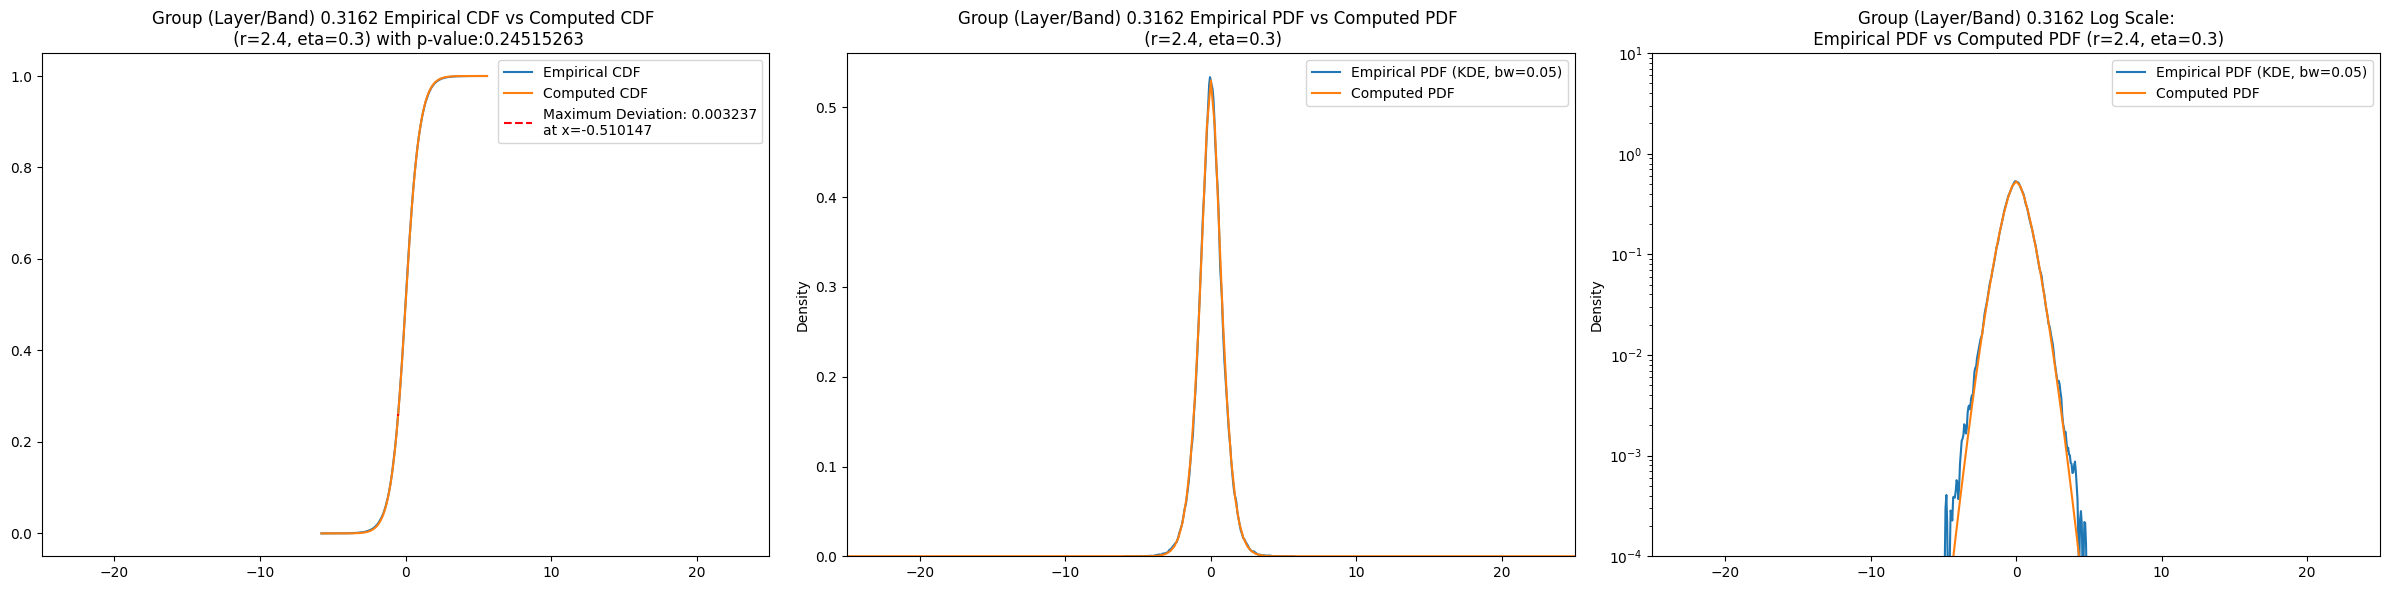

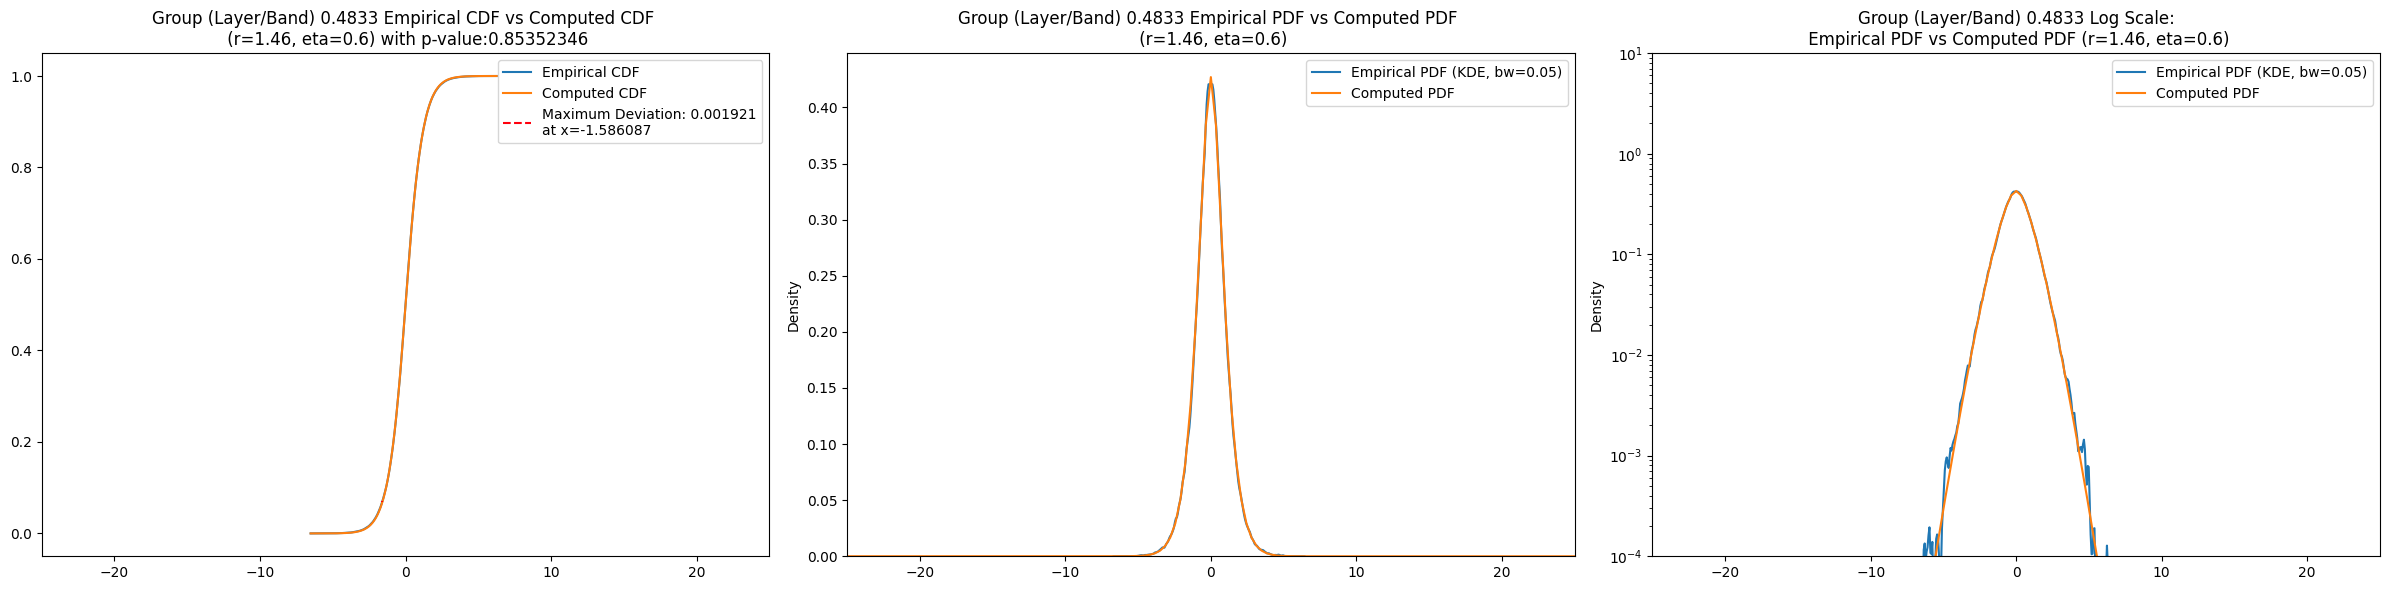

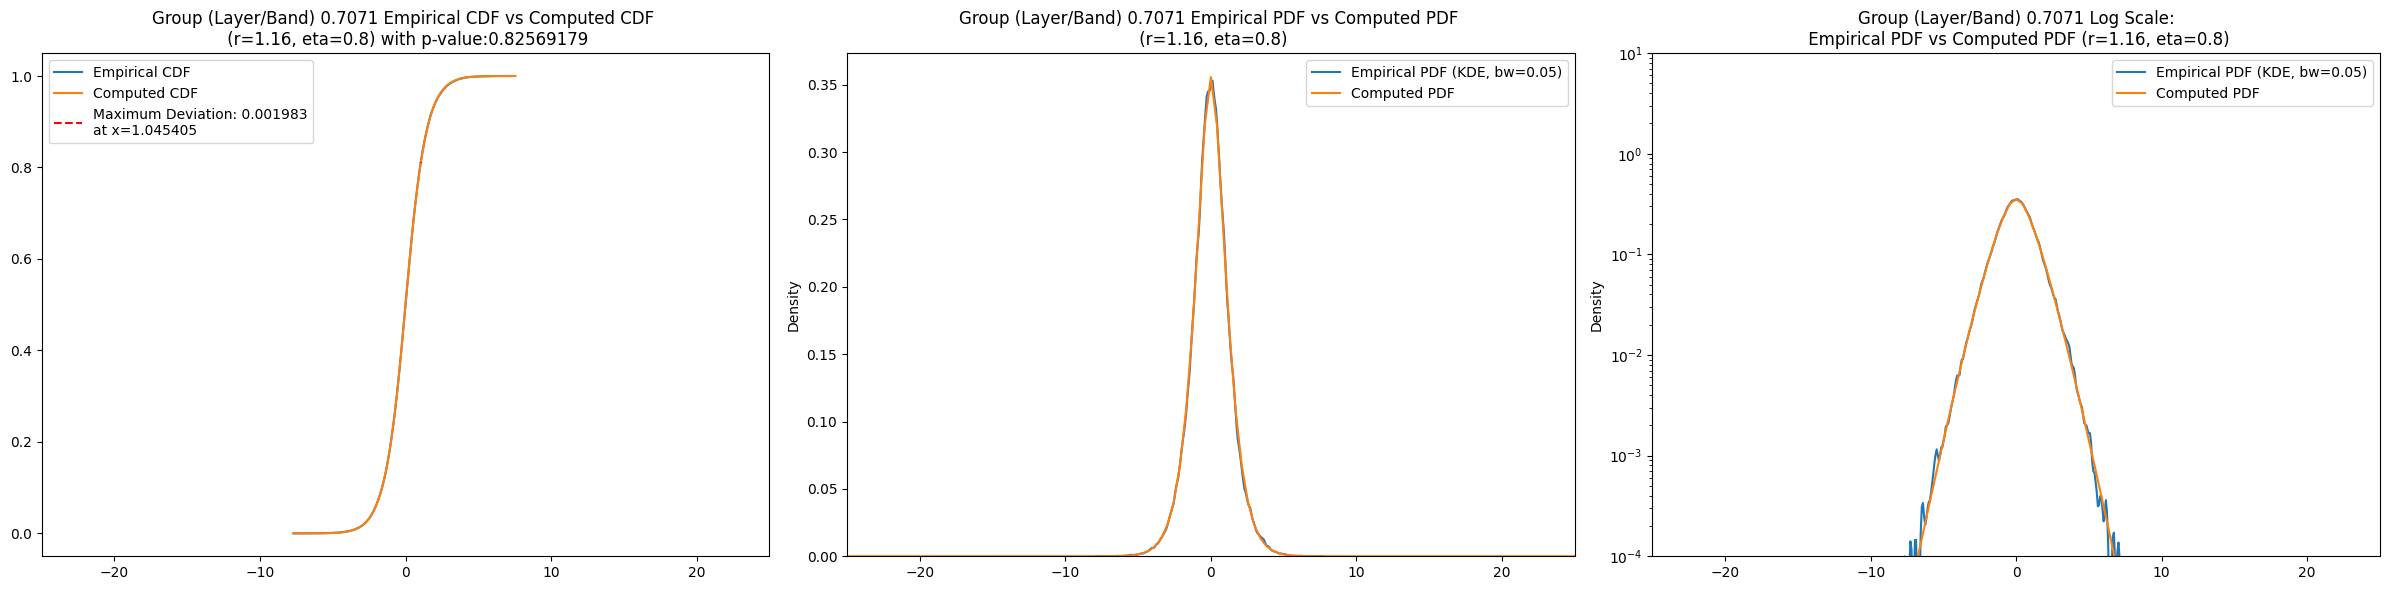

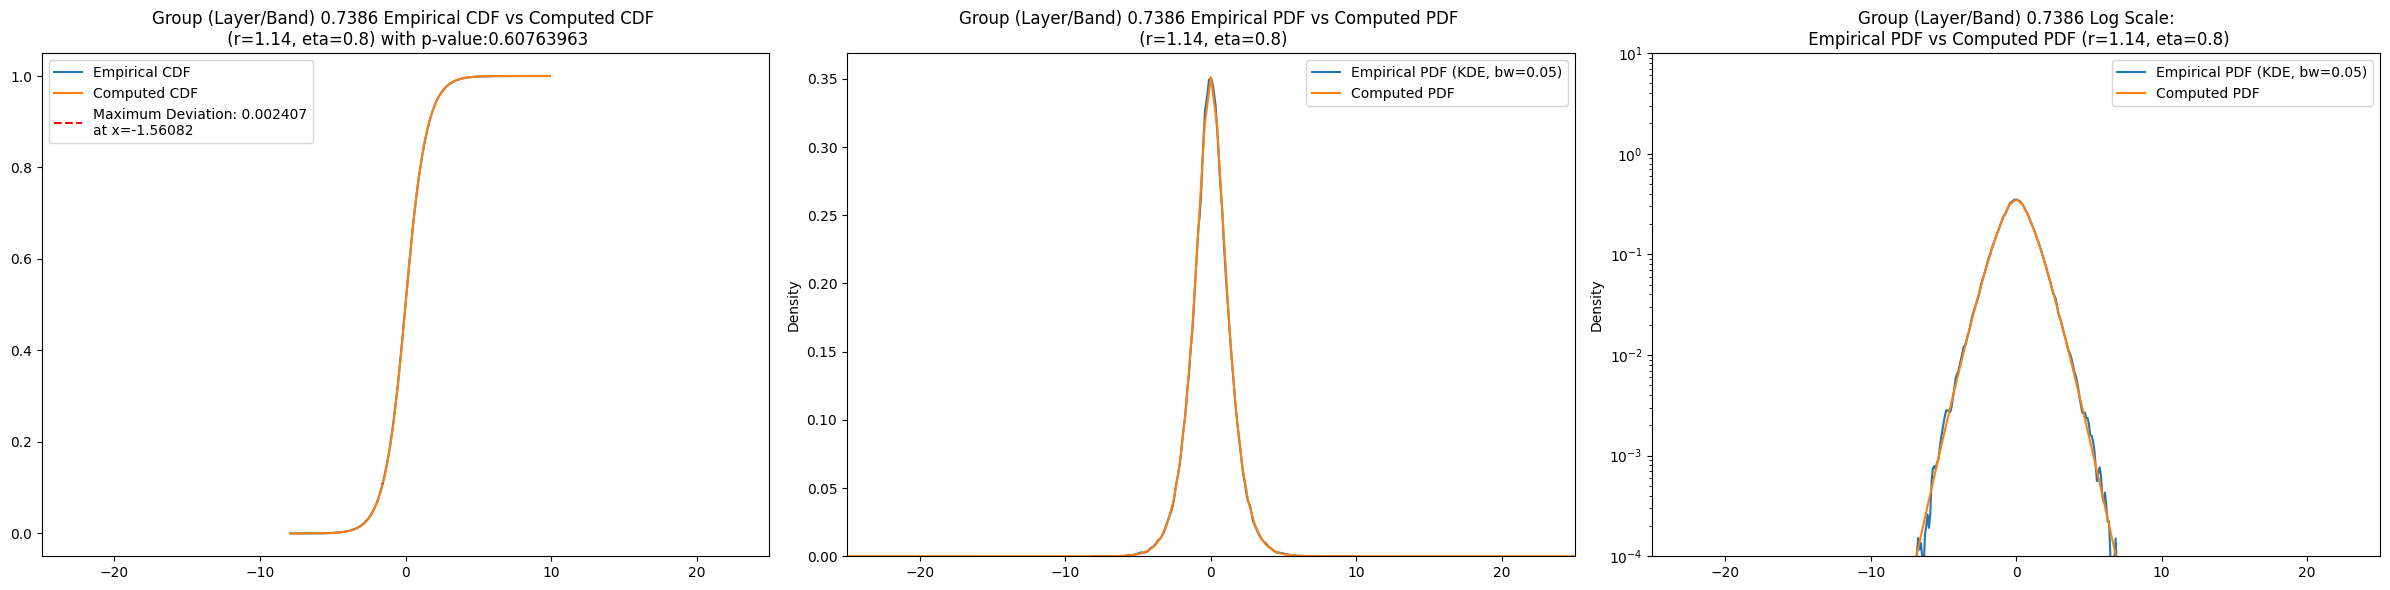

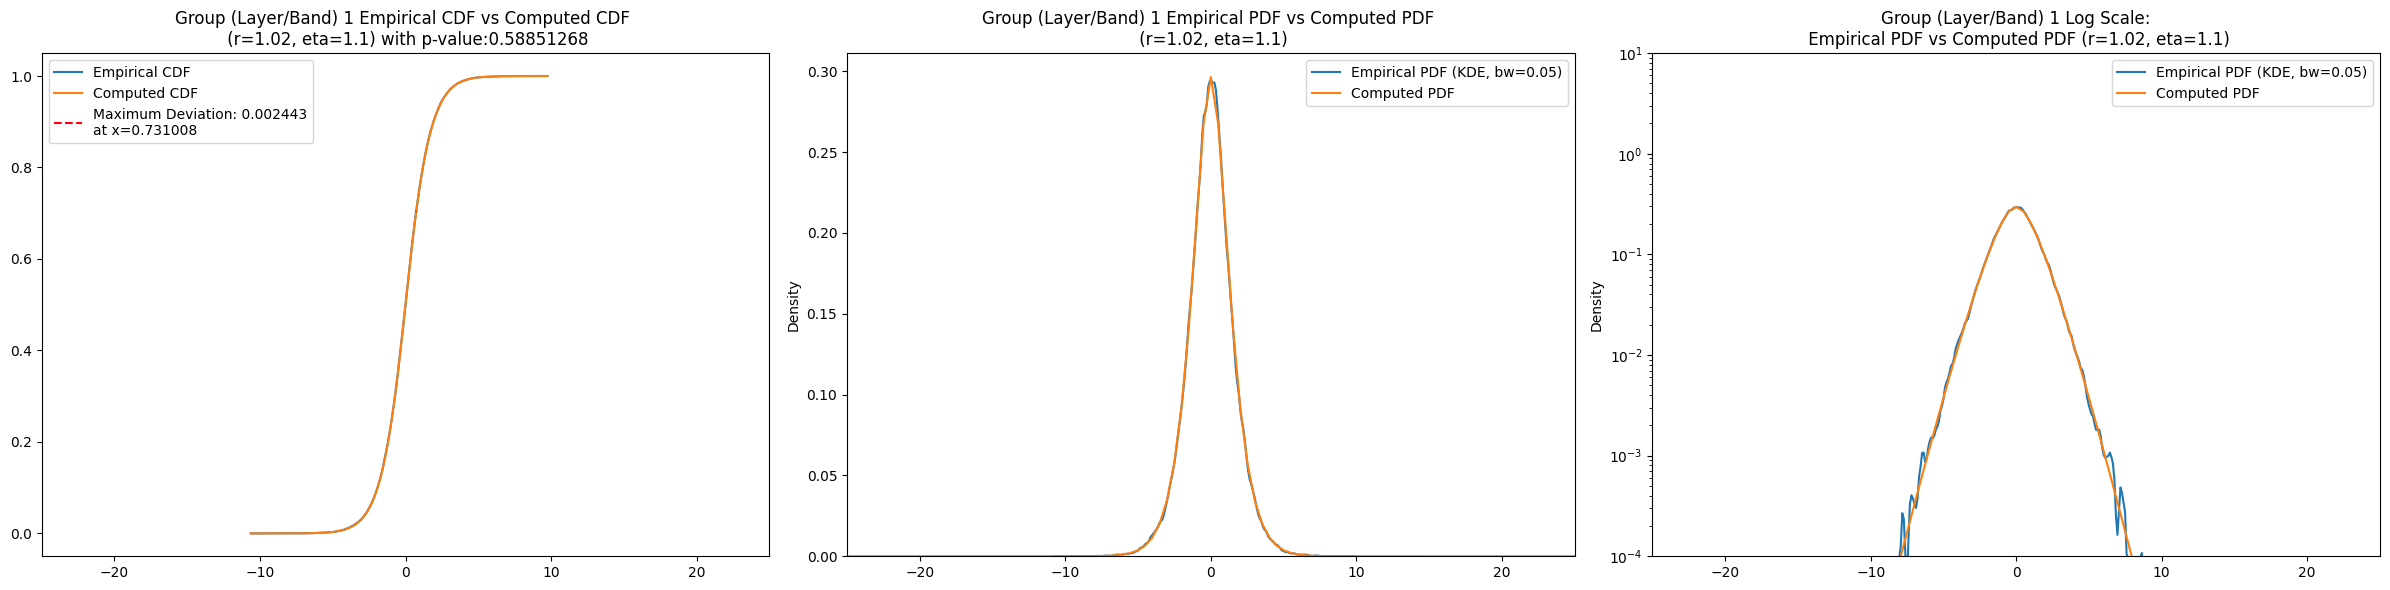

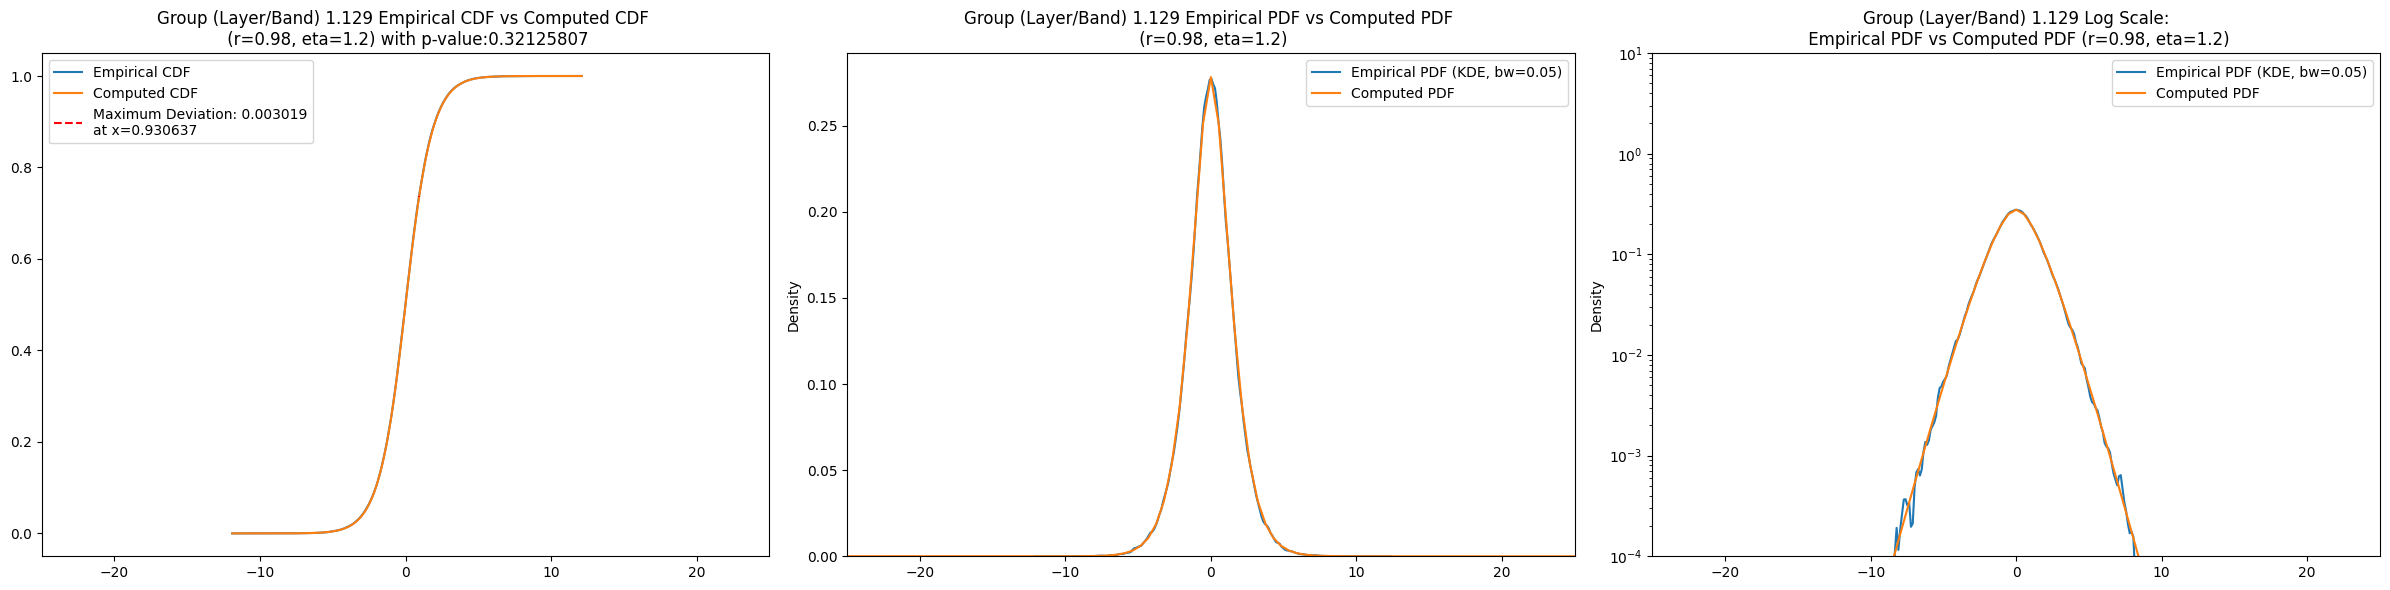

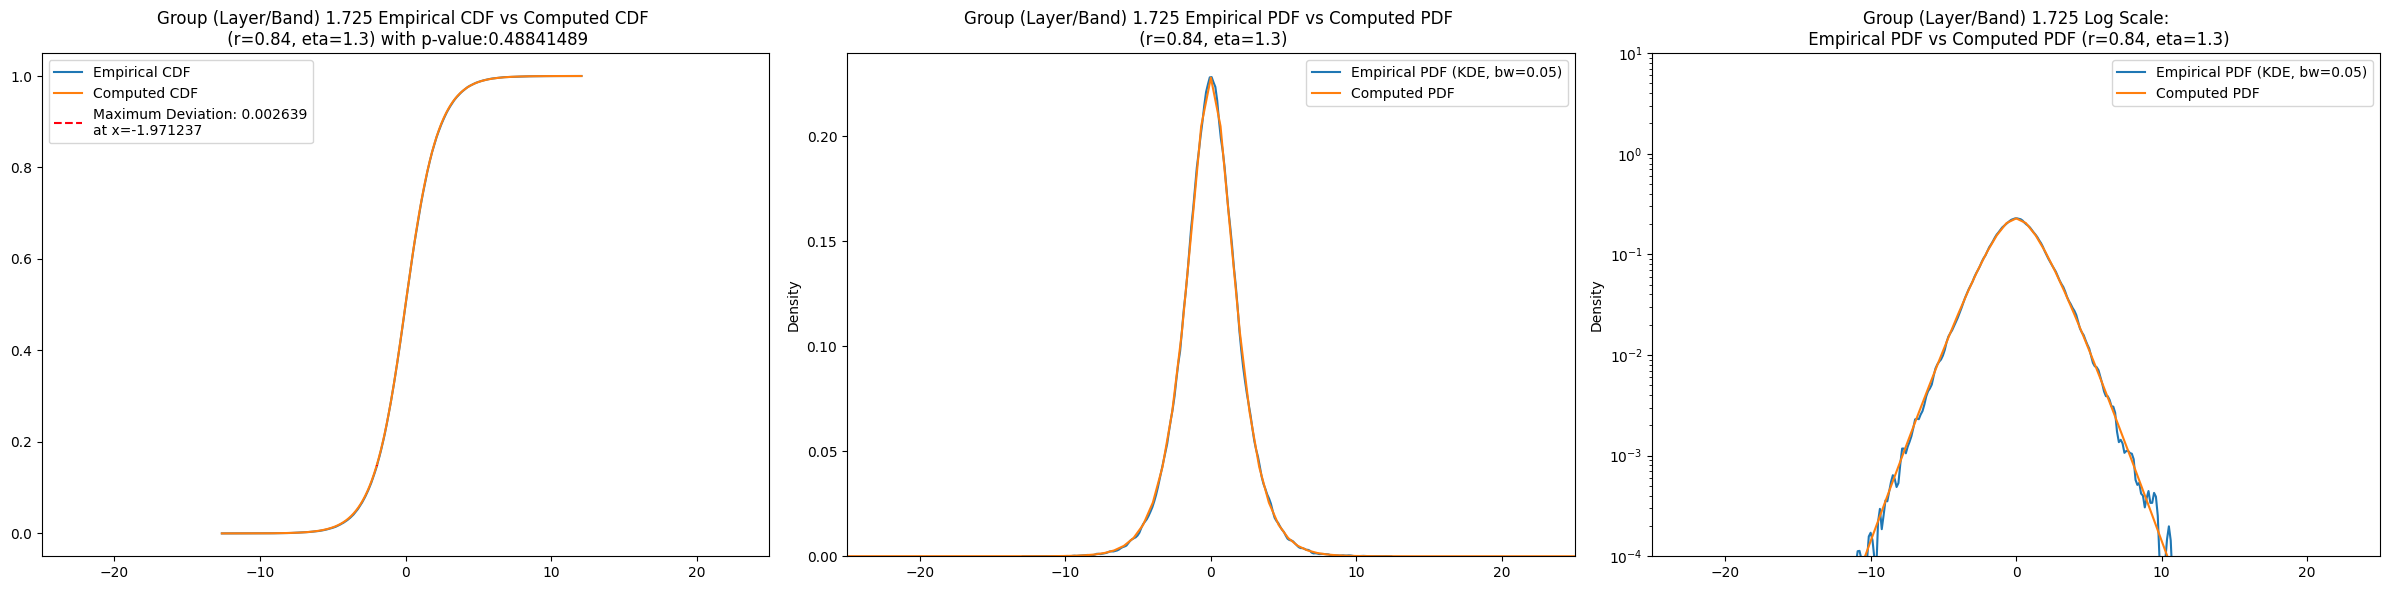

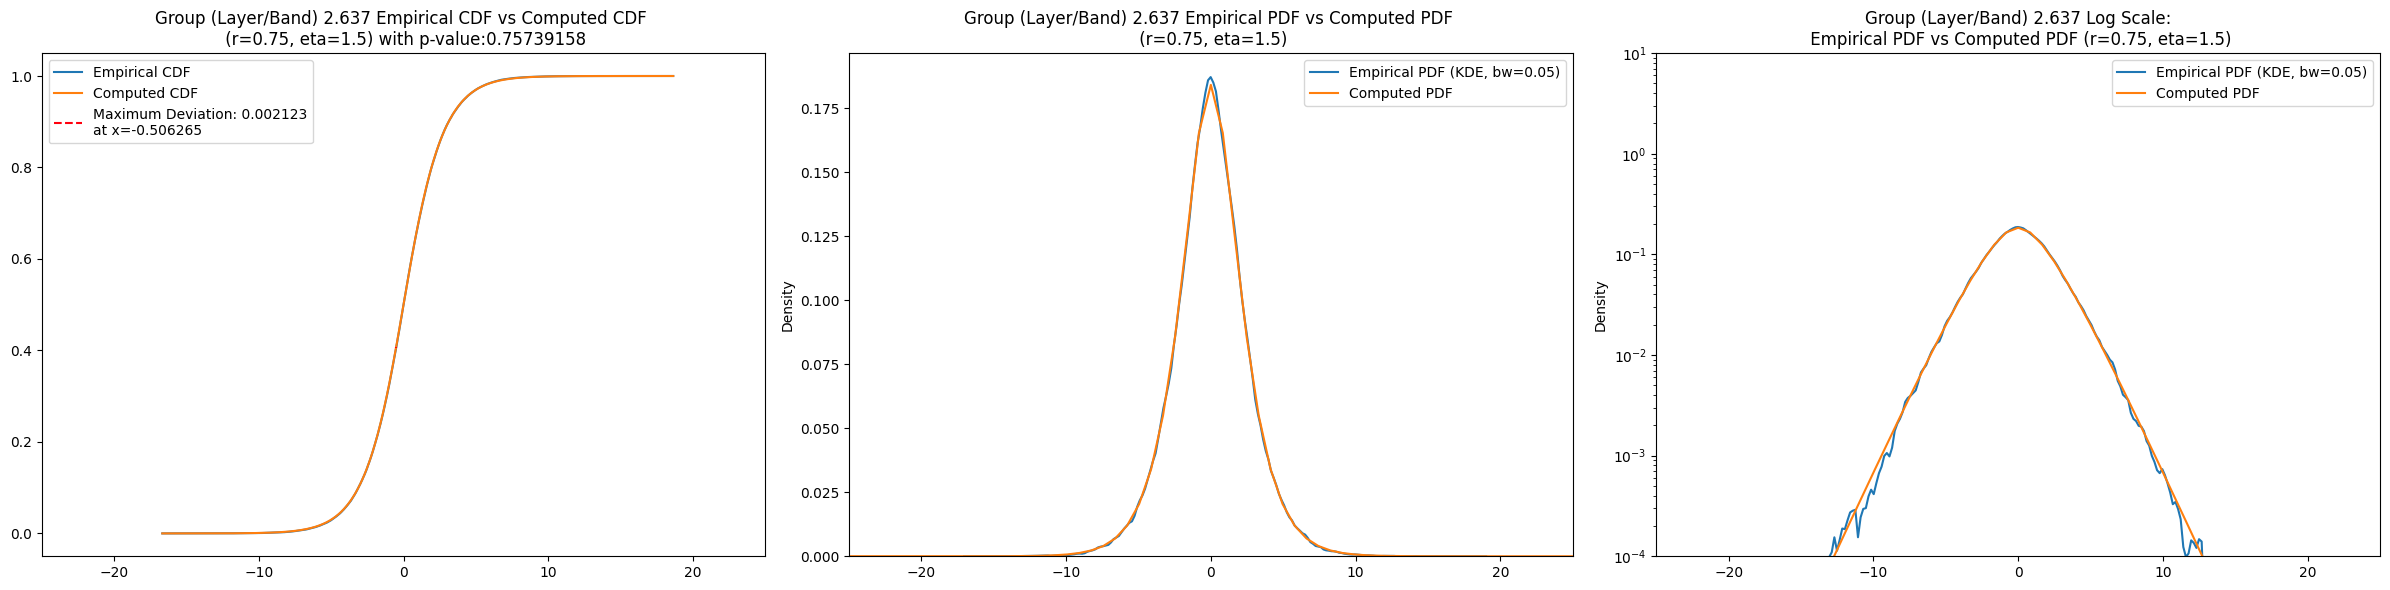

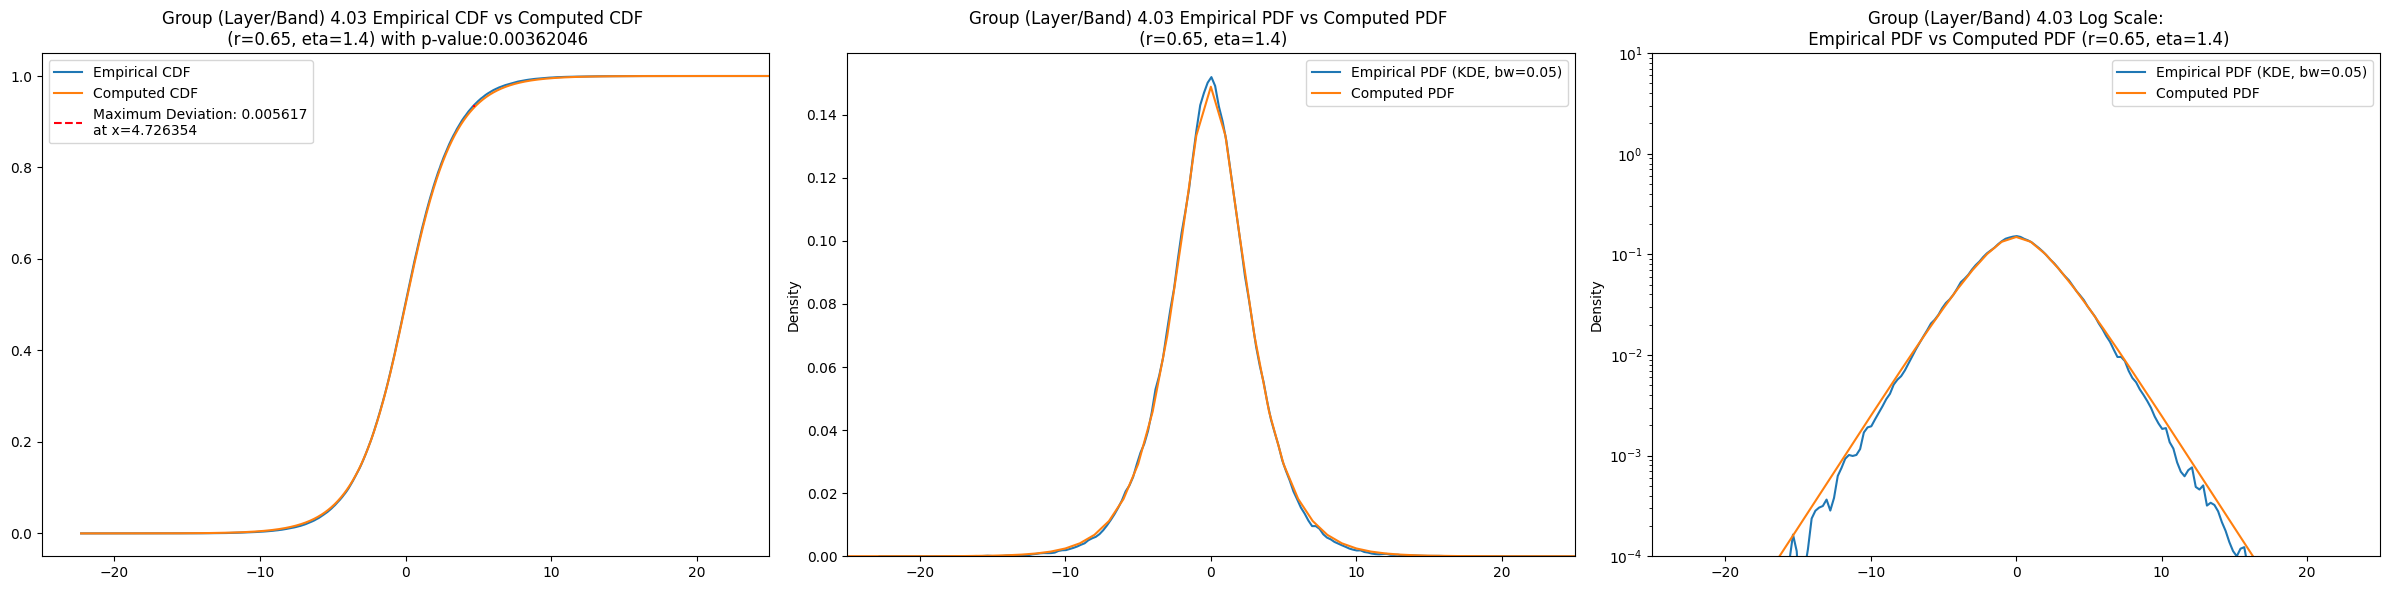

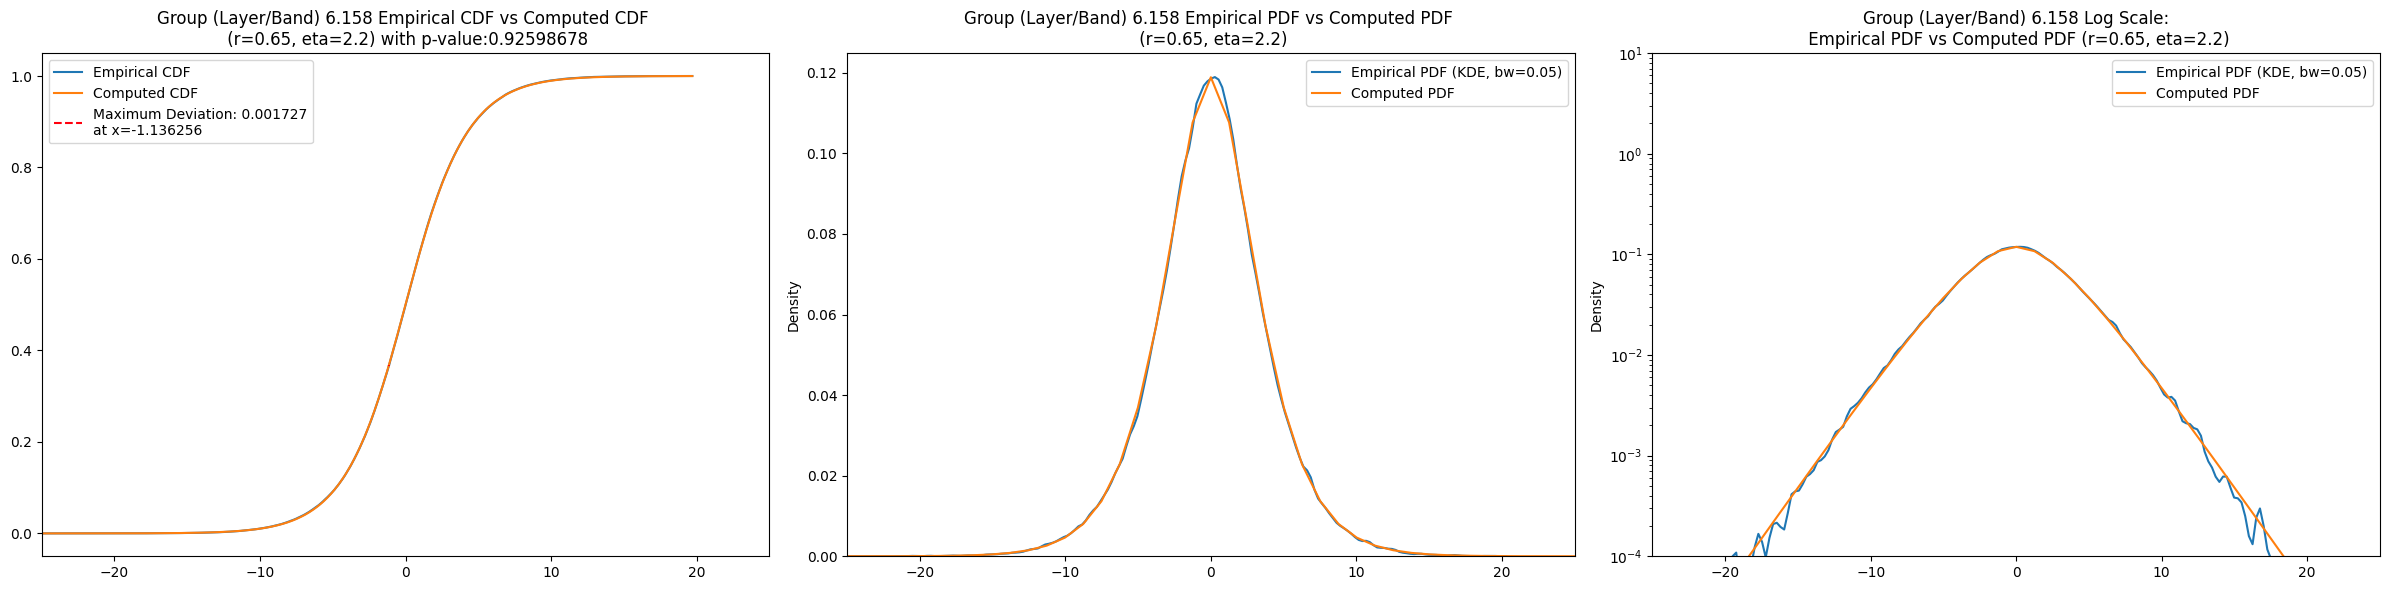

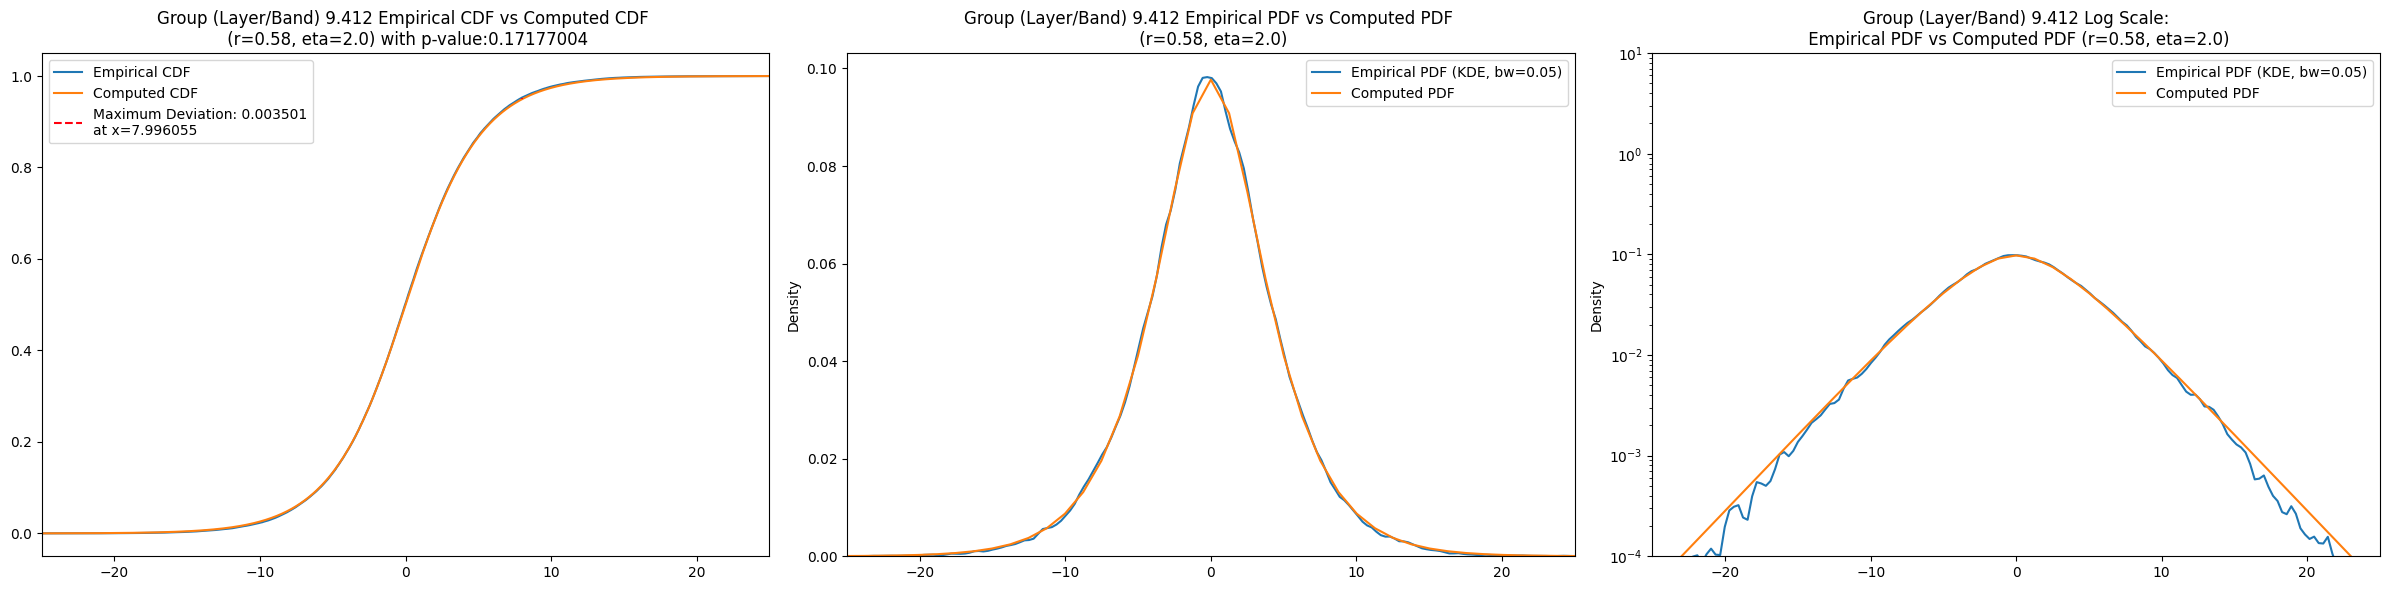

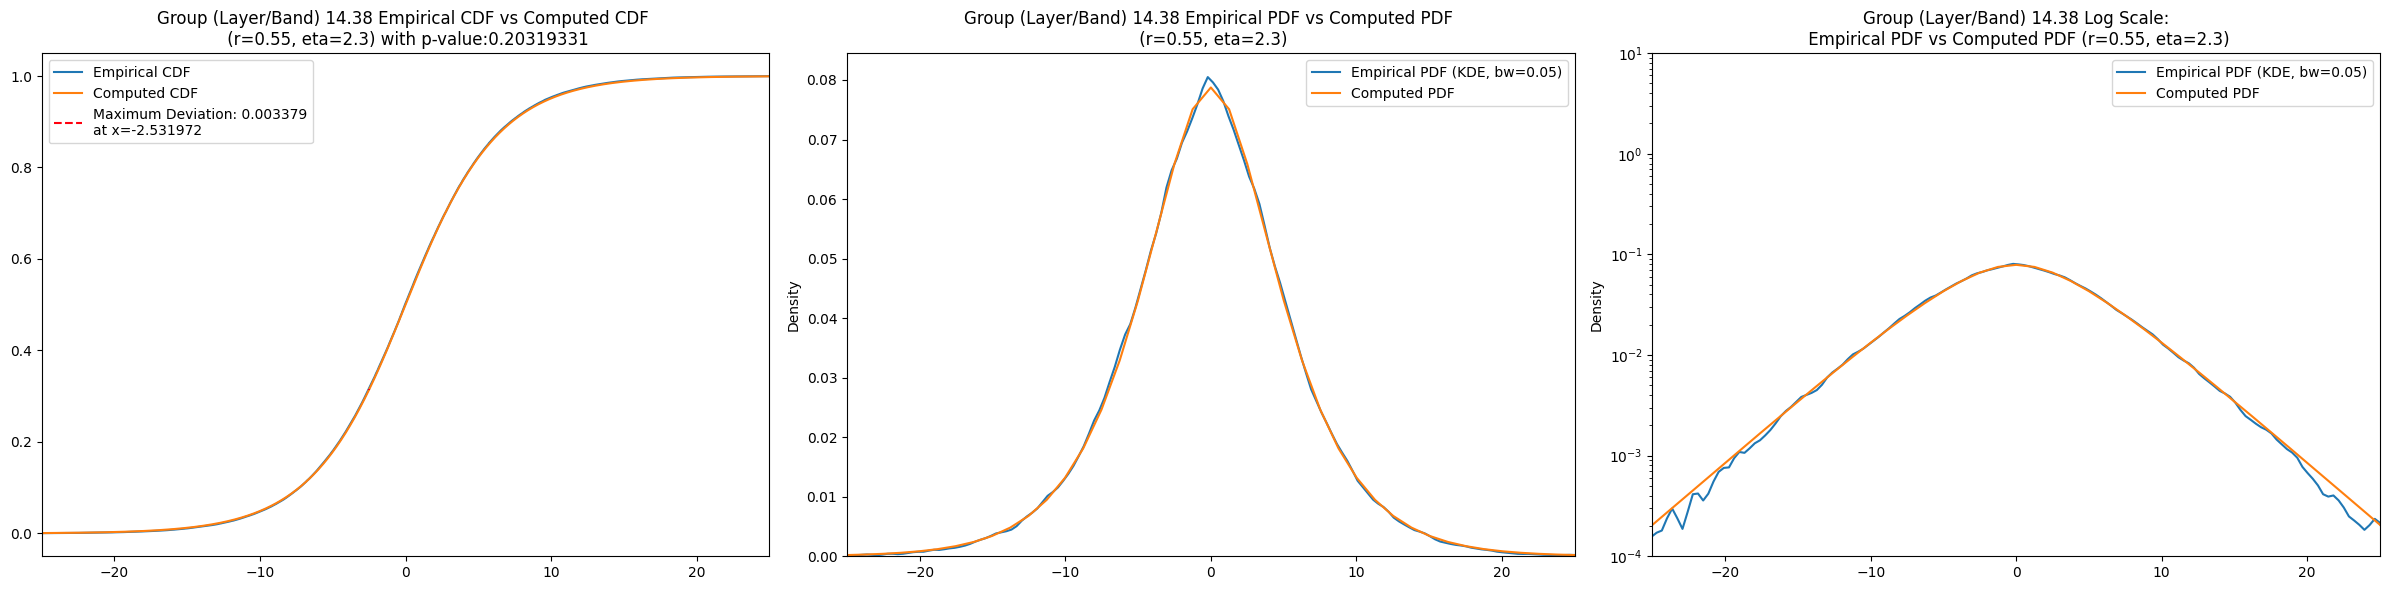

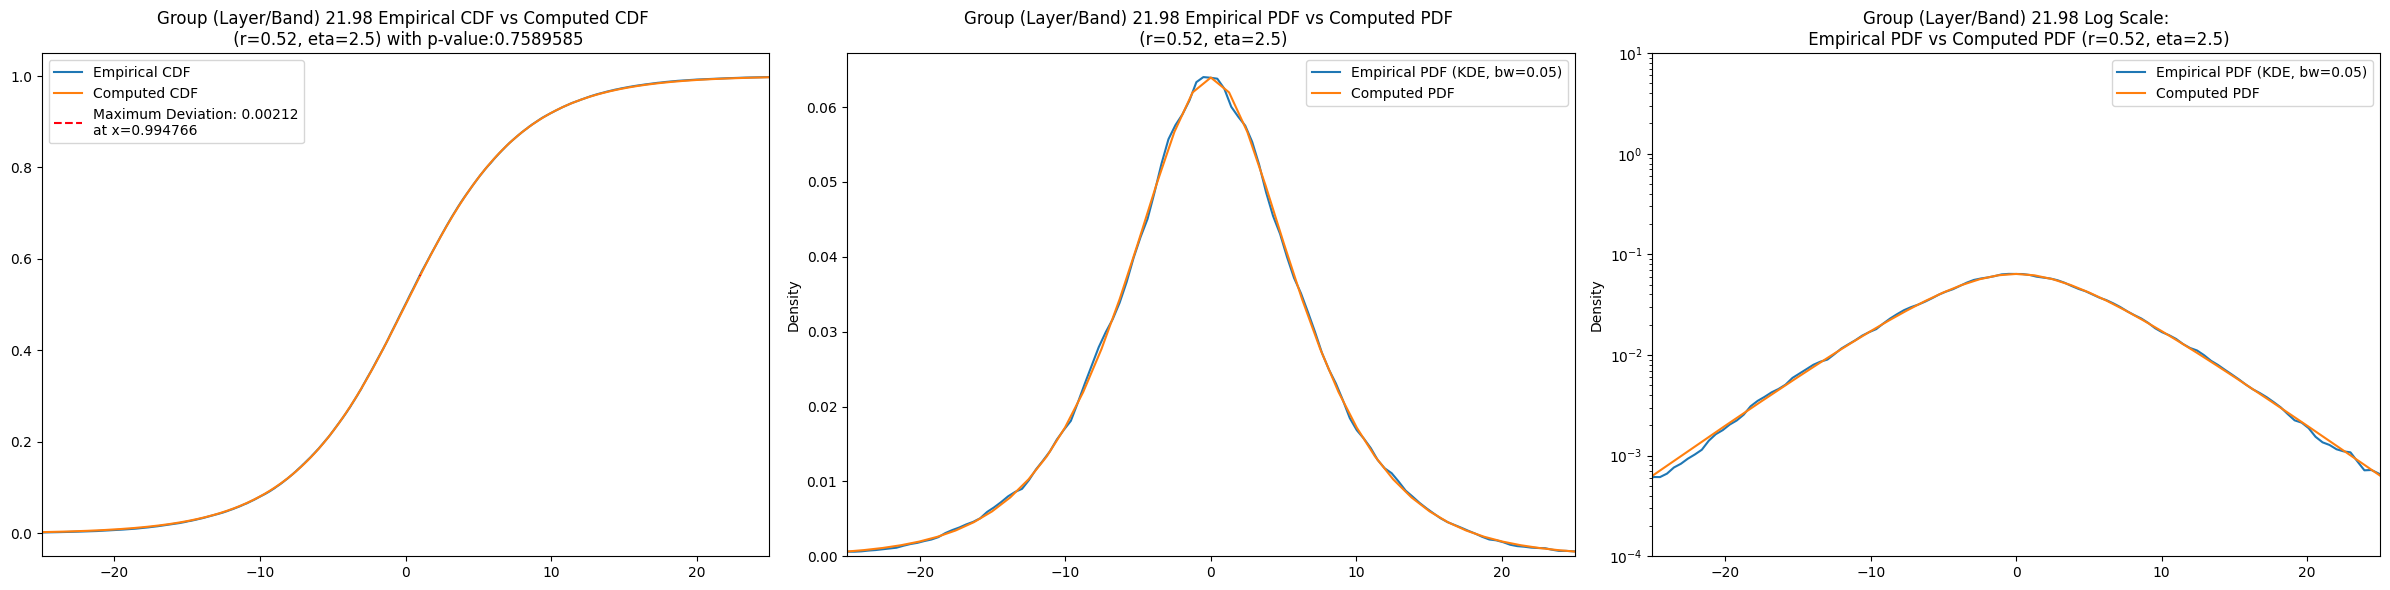

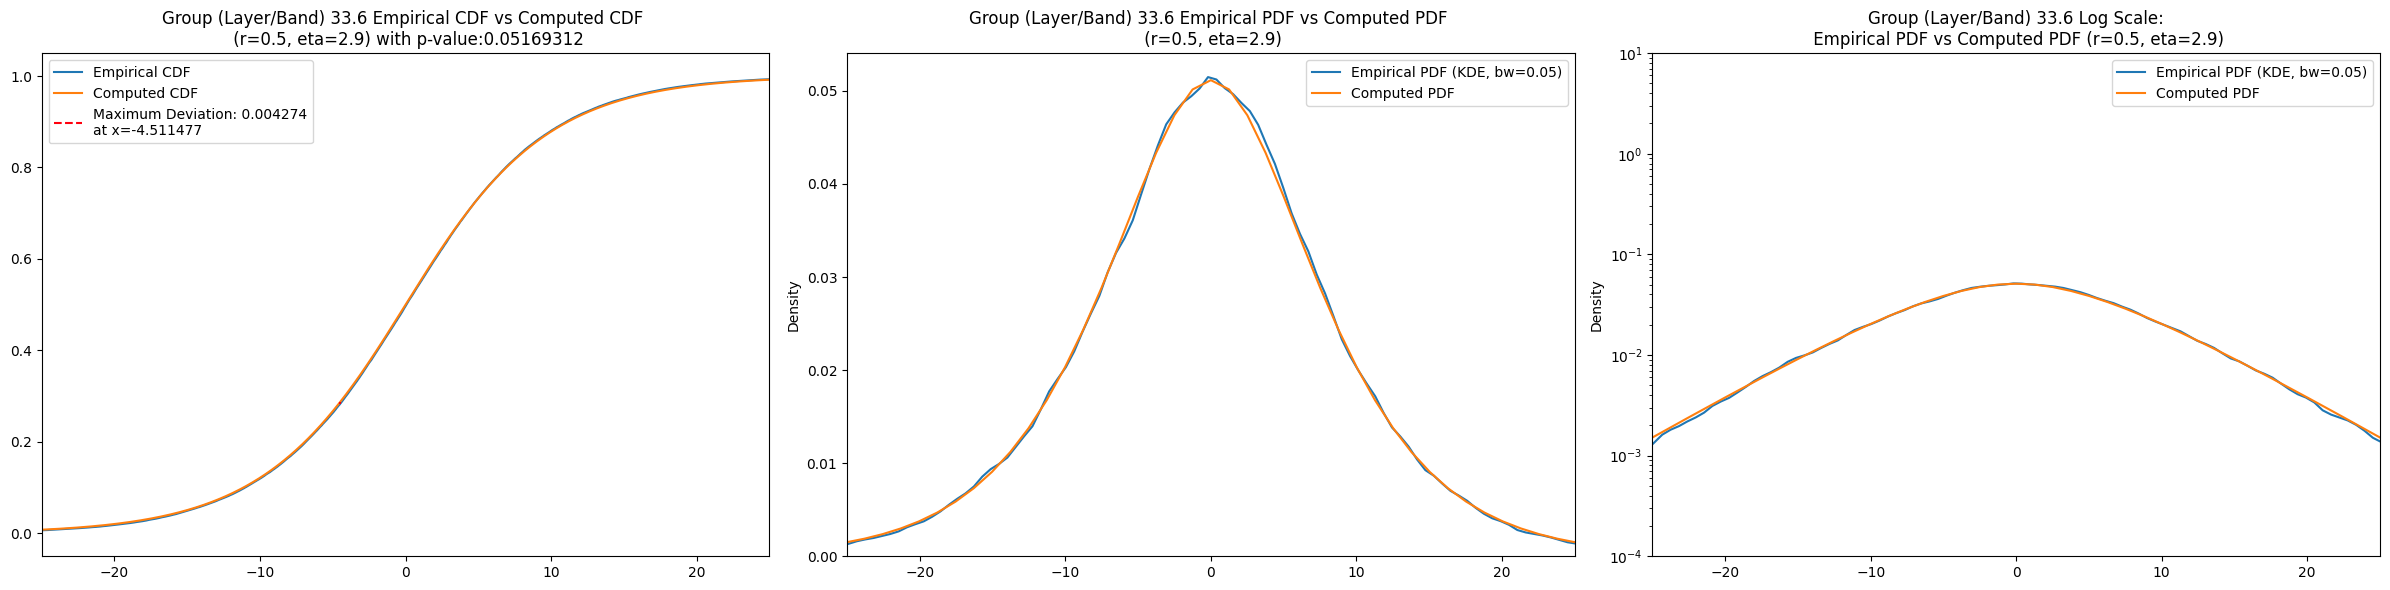

c:\Users\yashd\.conda\envs\hbmv_backup2\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


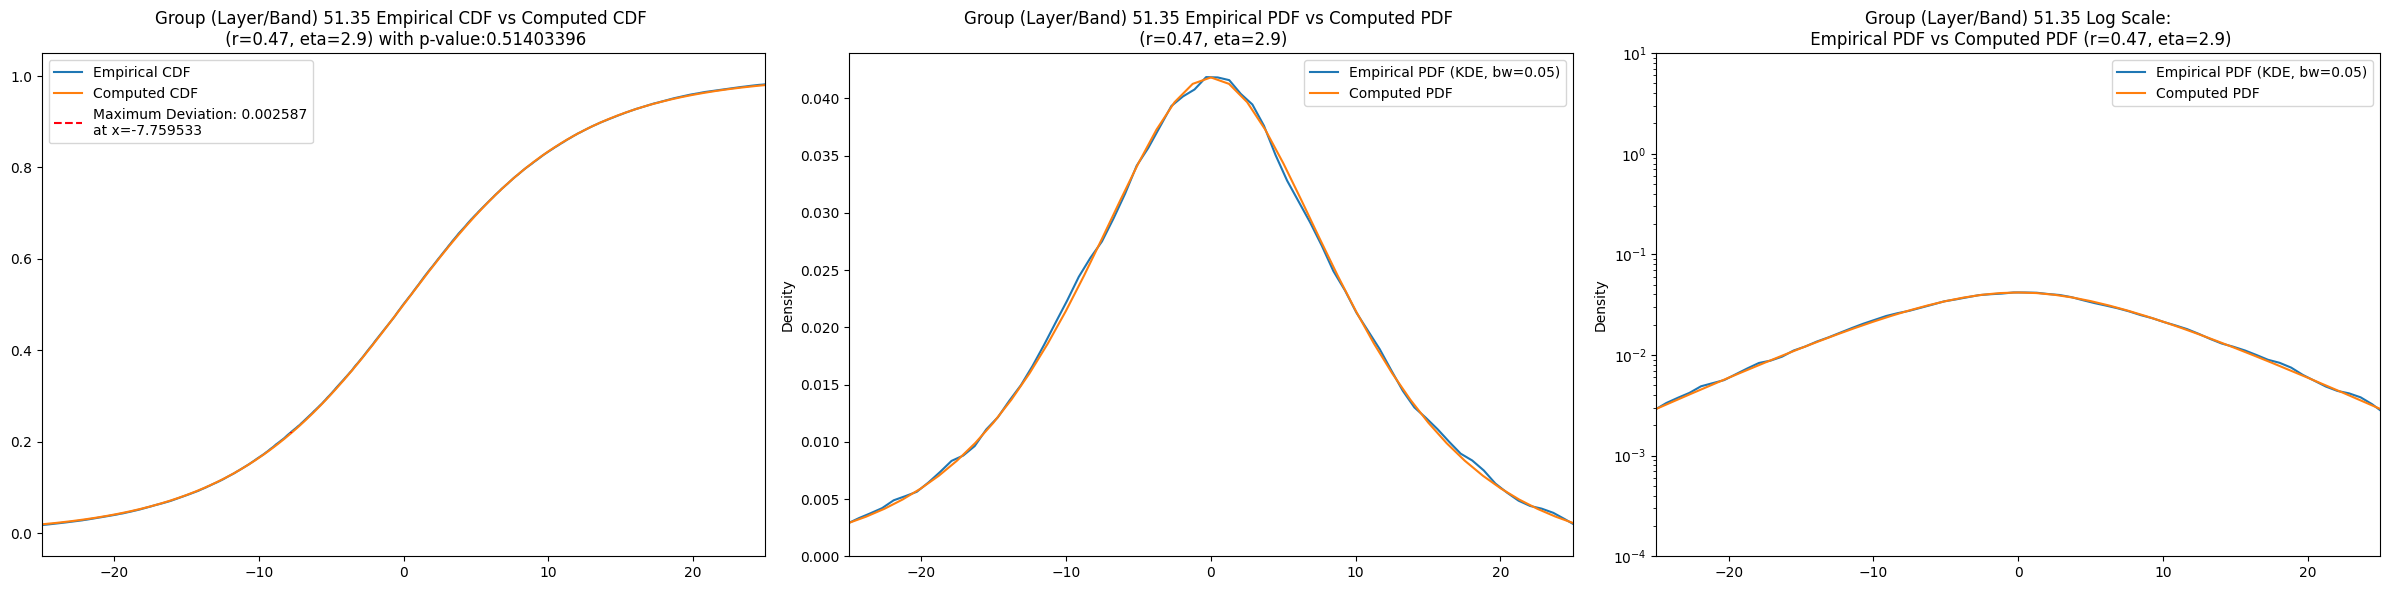

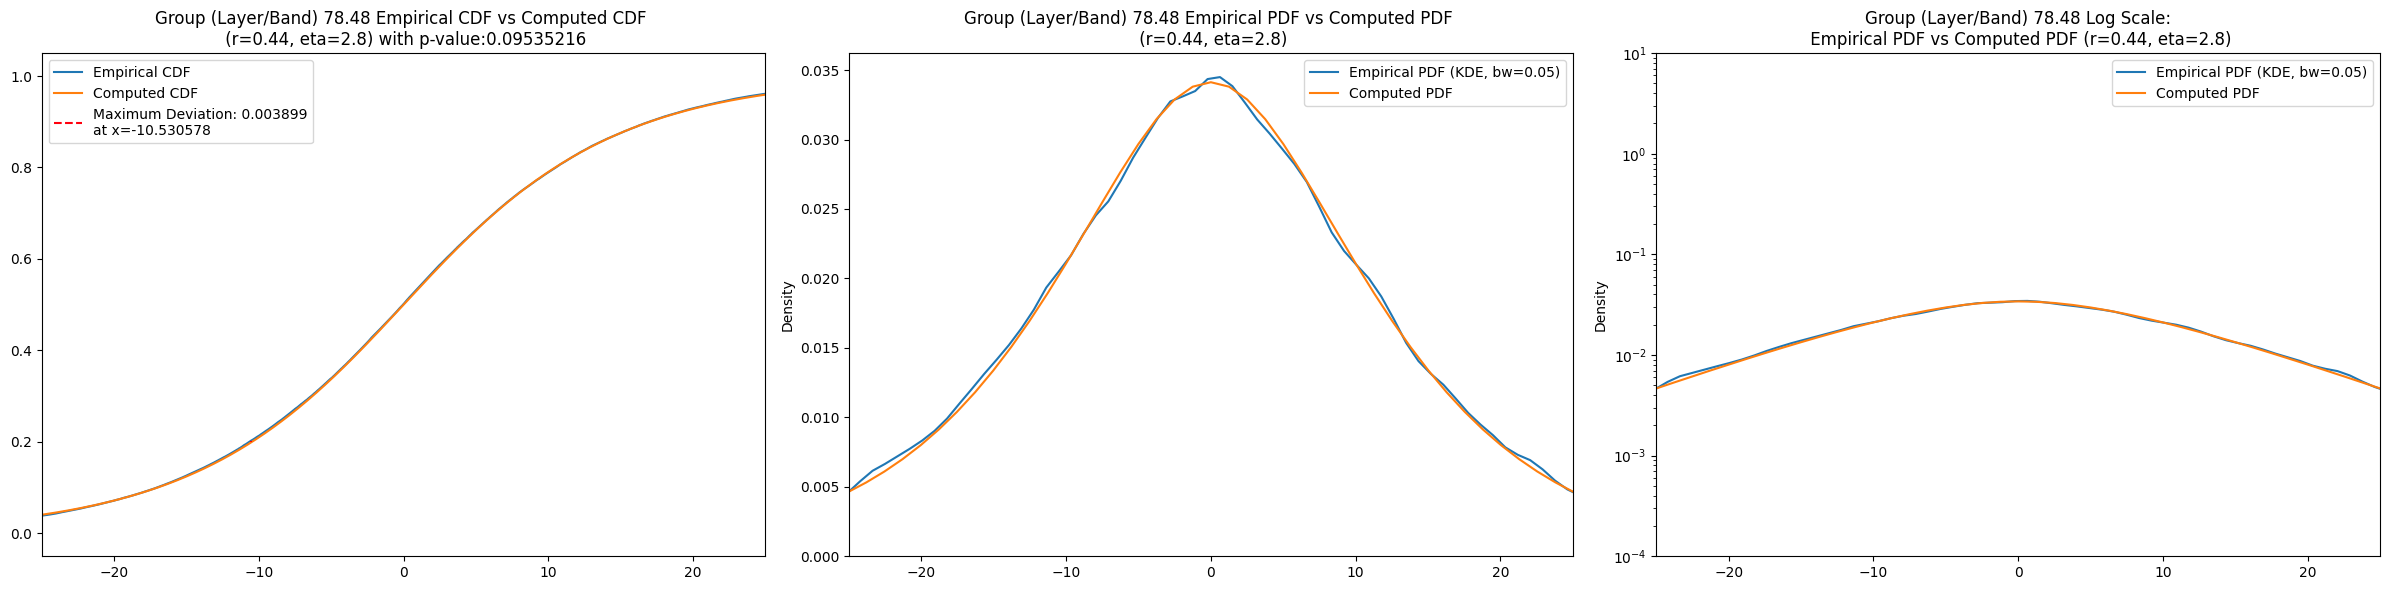

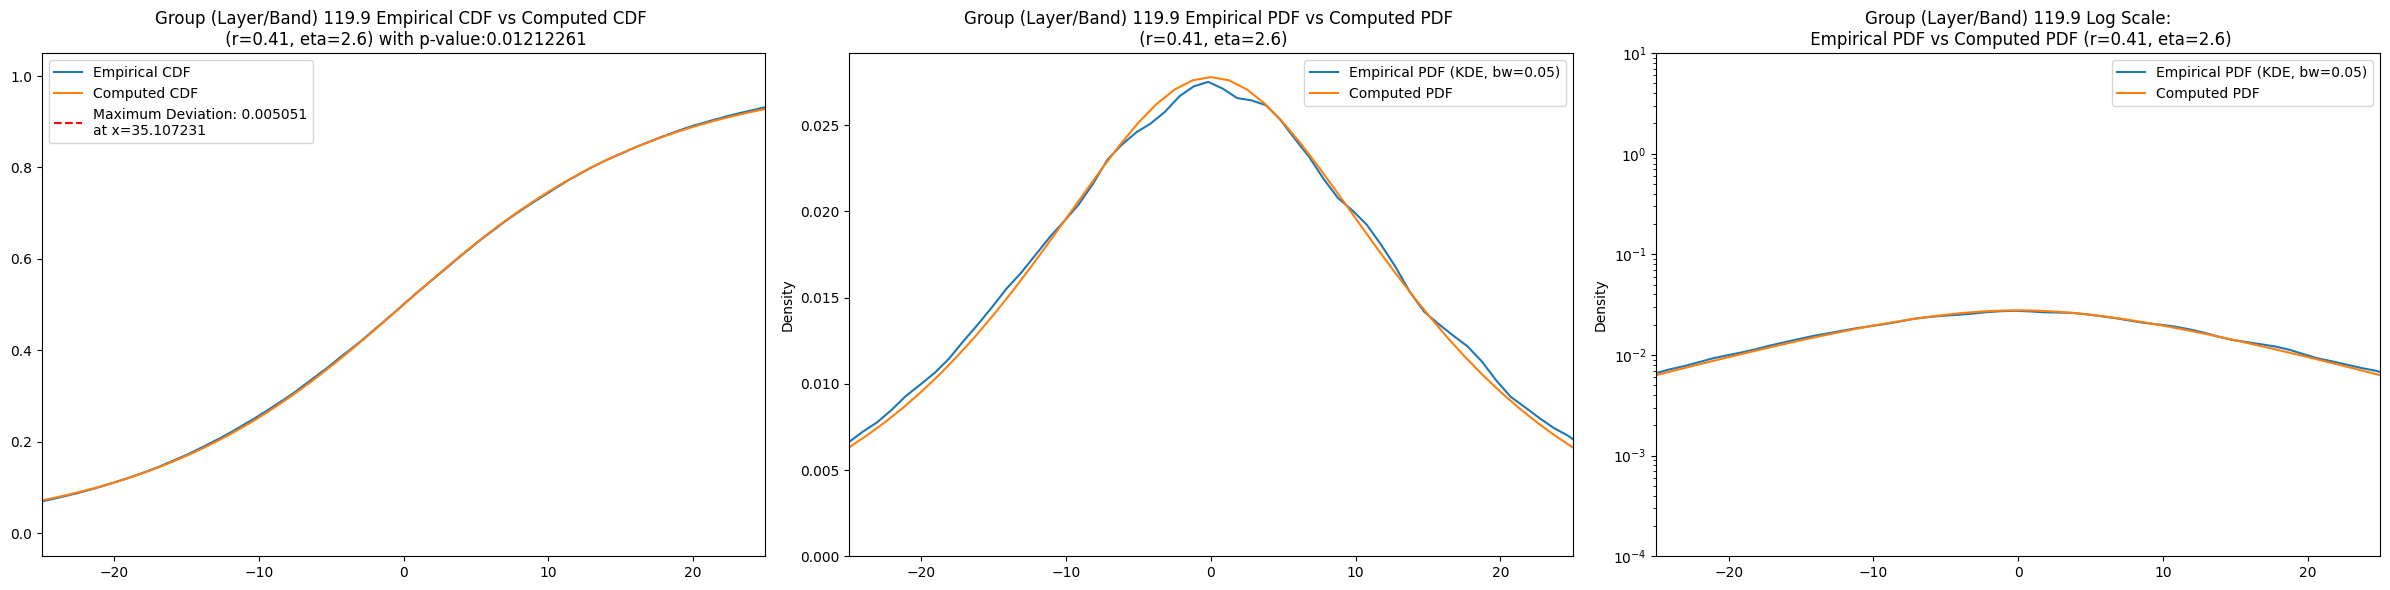

C:\Users\yashd\AppData\Local\Temp\ipykernel_21412\1947674508.py:13: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.savefig(os.path.join(CWD, "plots", f'compare_cdf_pdf_layer_{group}.jpg'), bbox_inches = 'tight', dpi = 300)


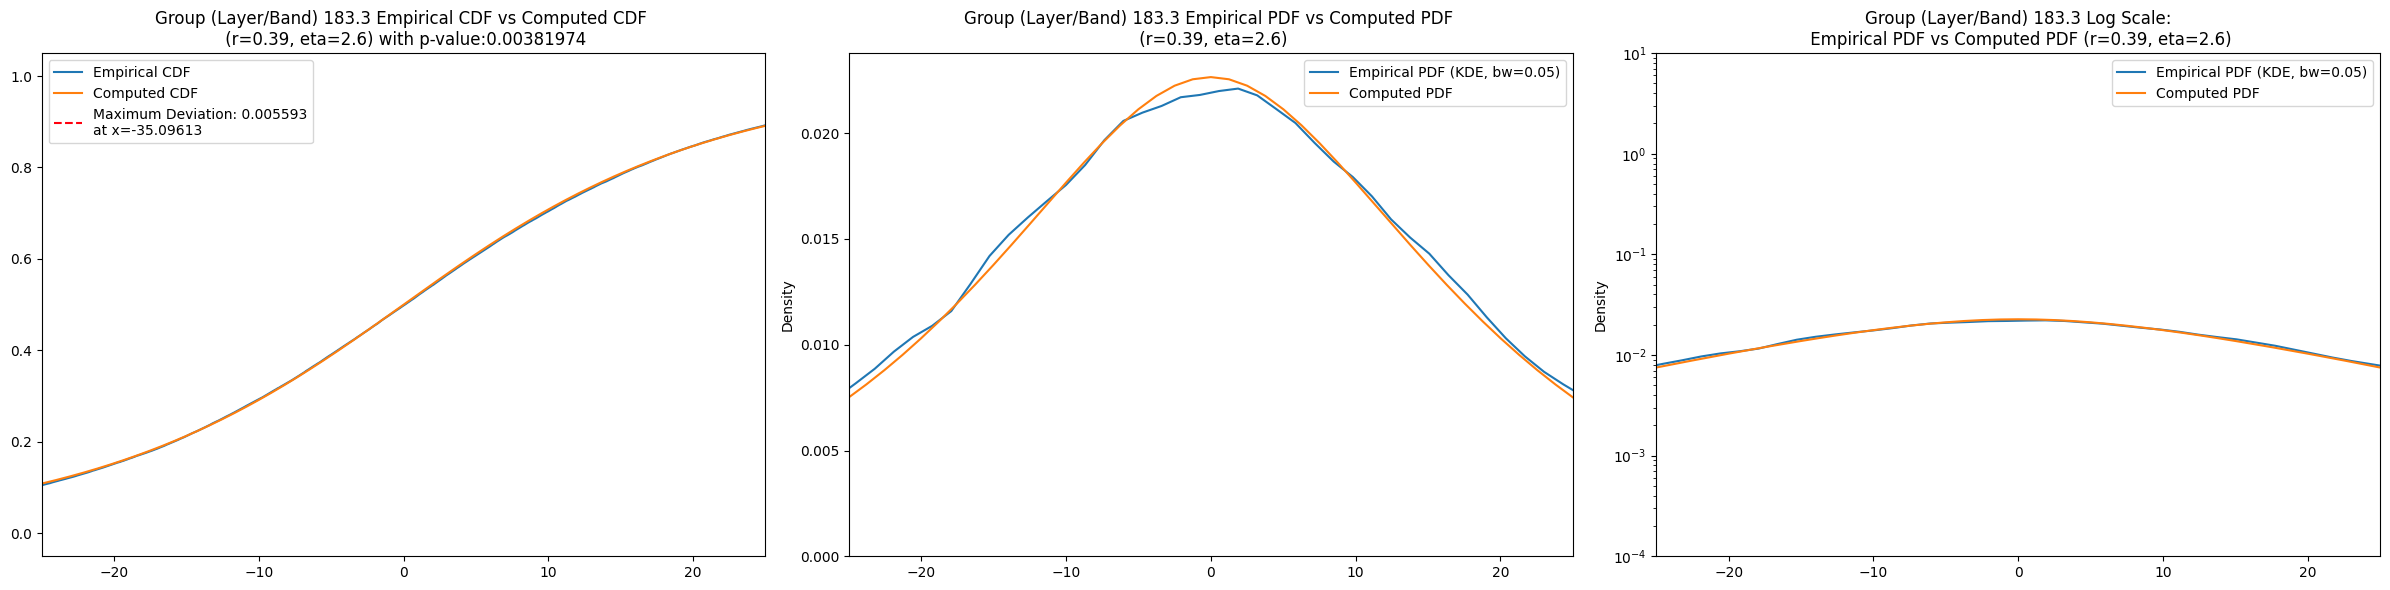

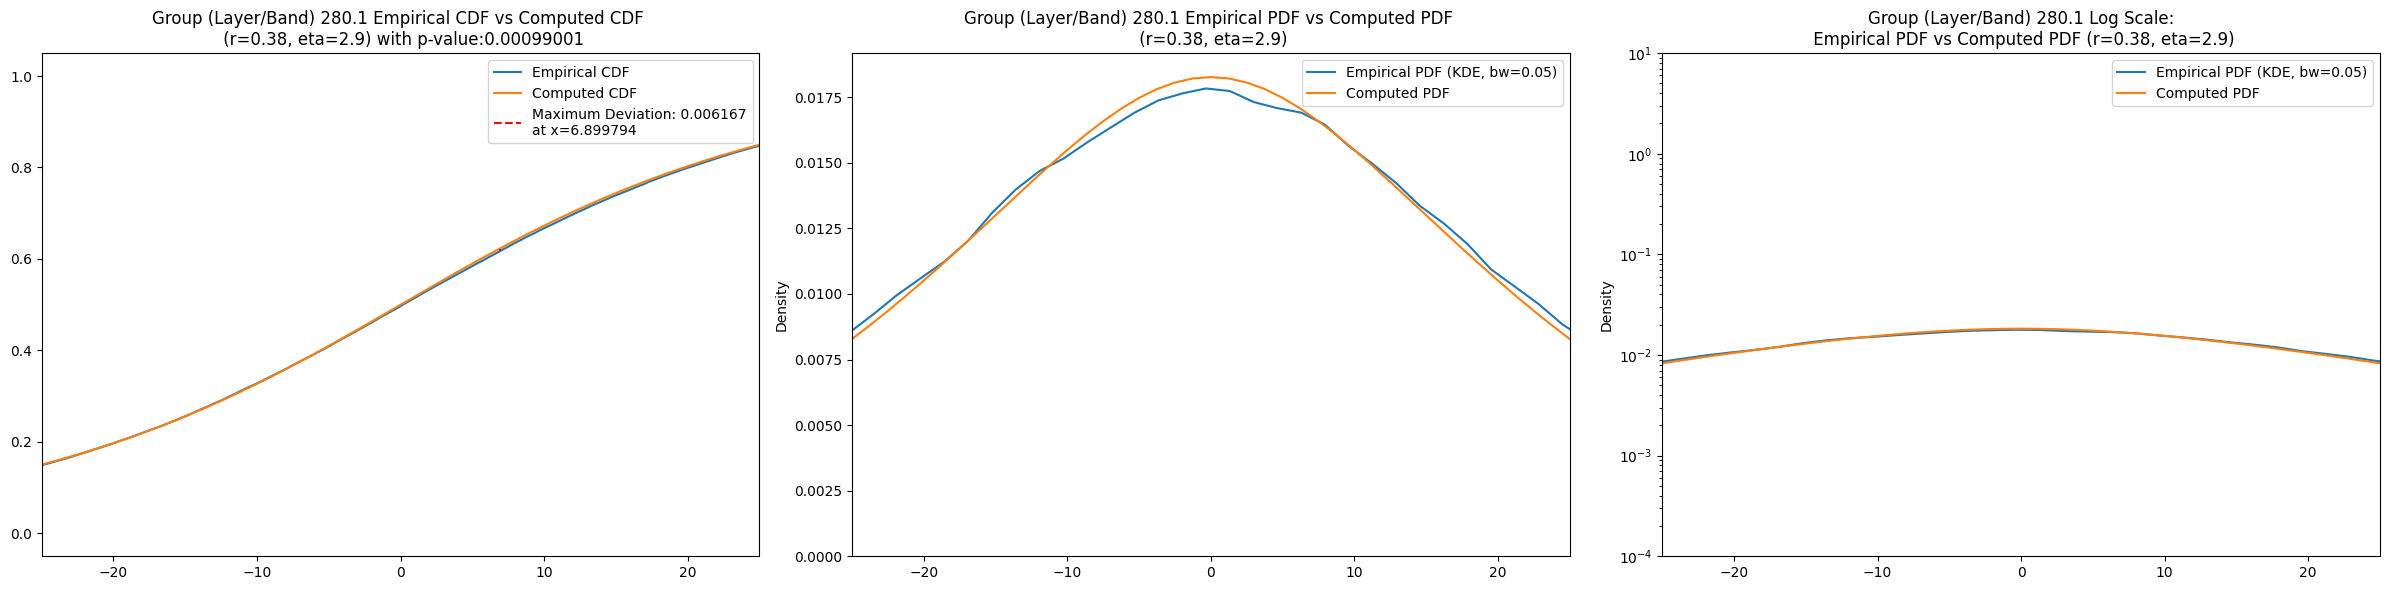

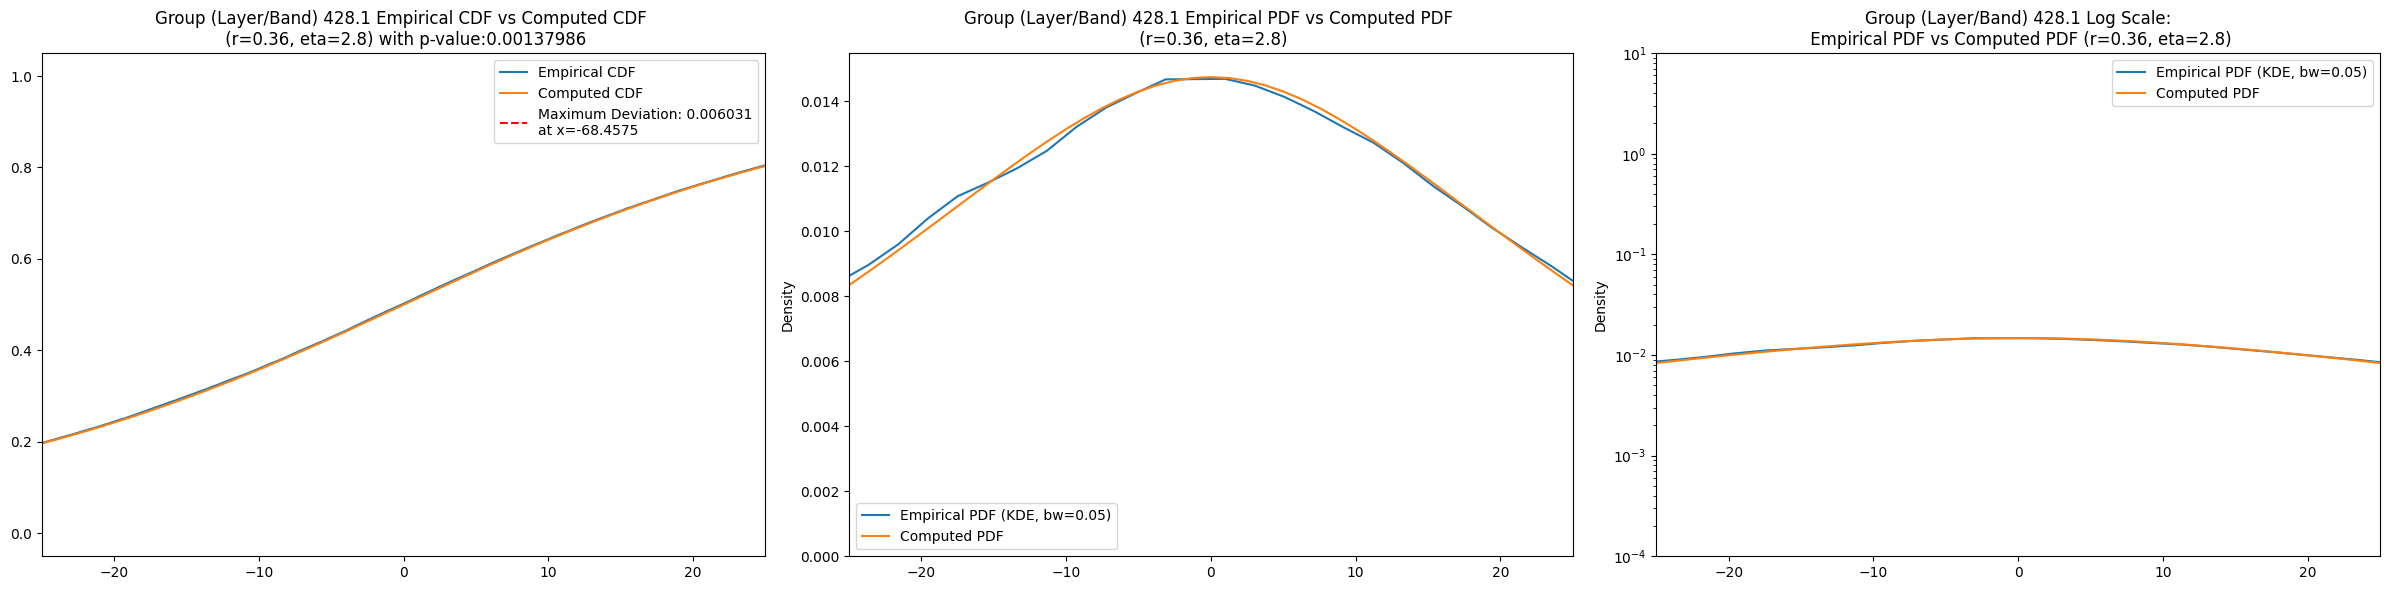

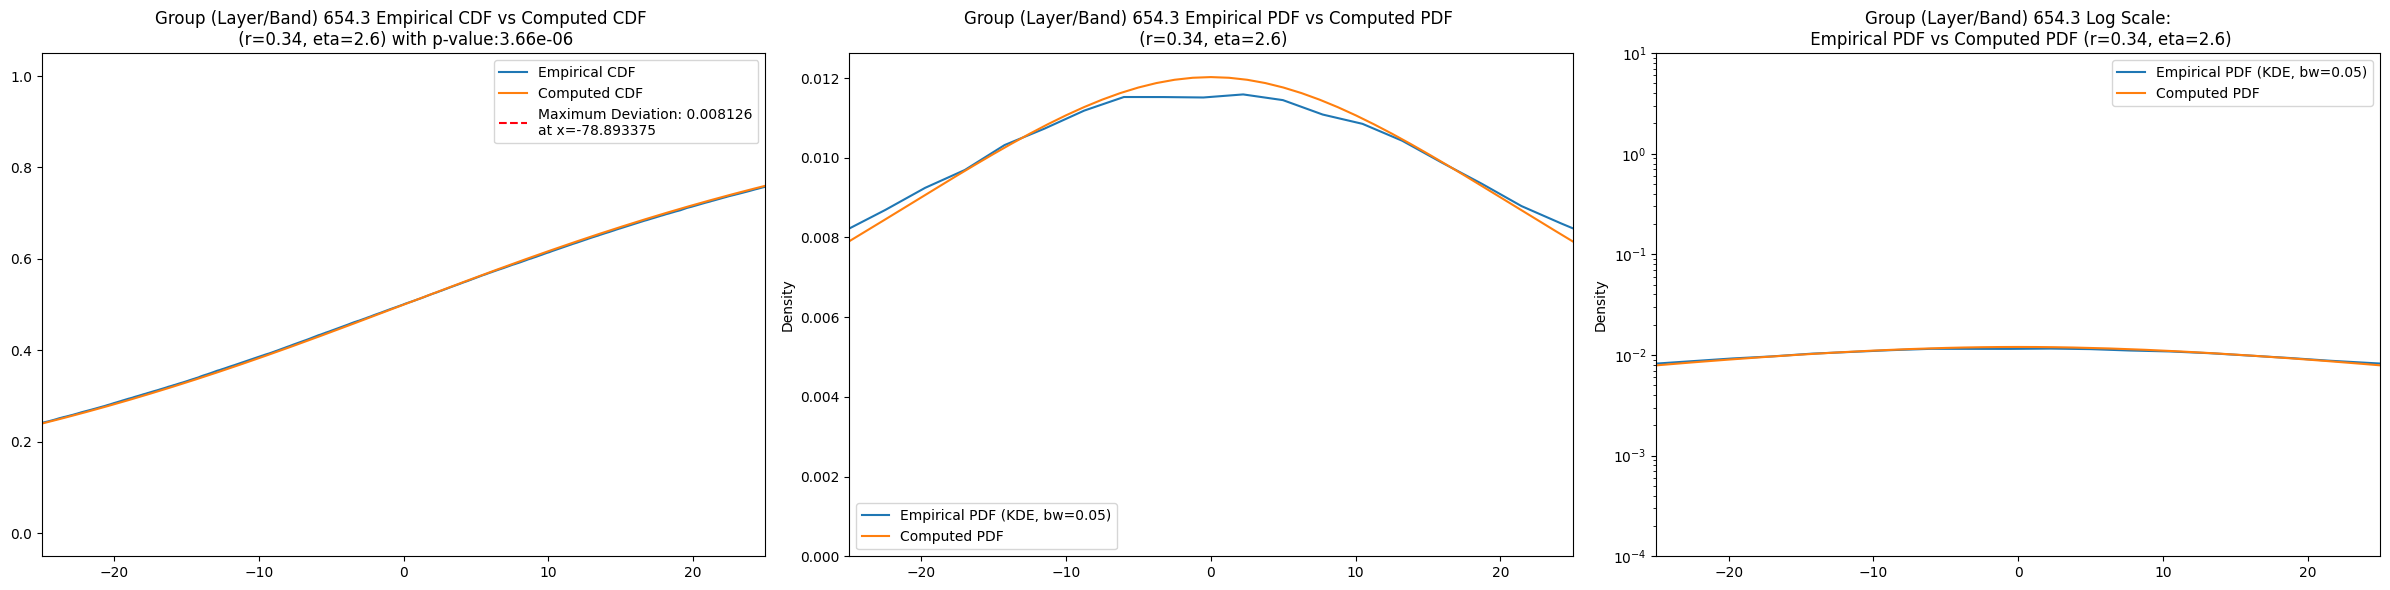

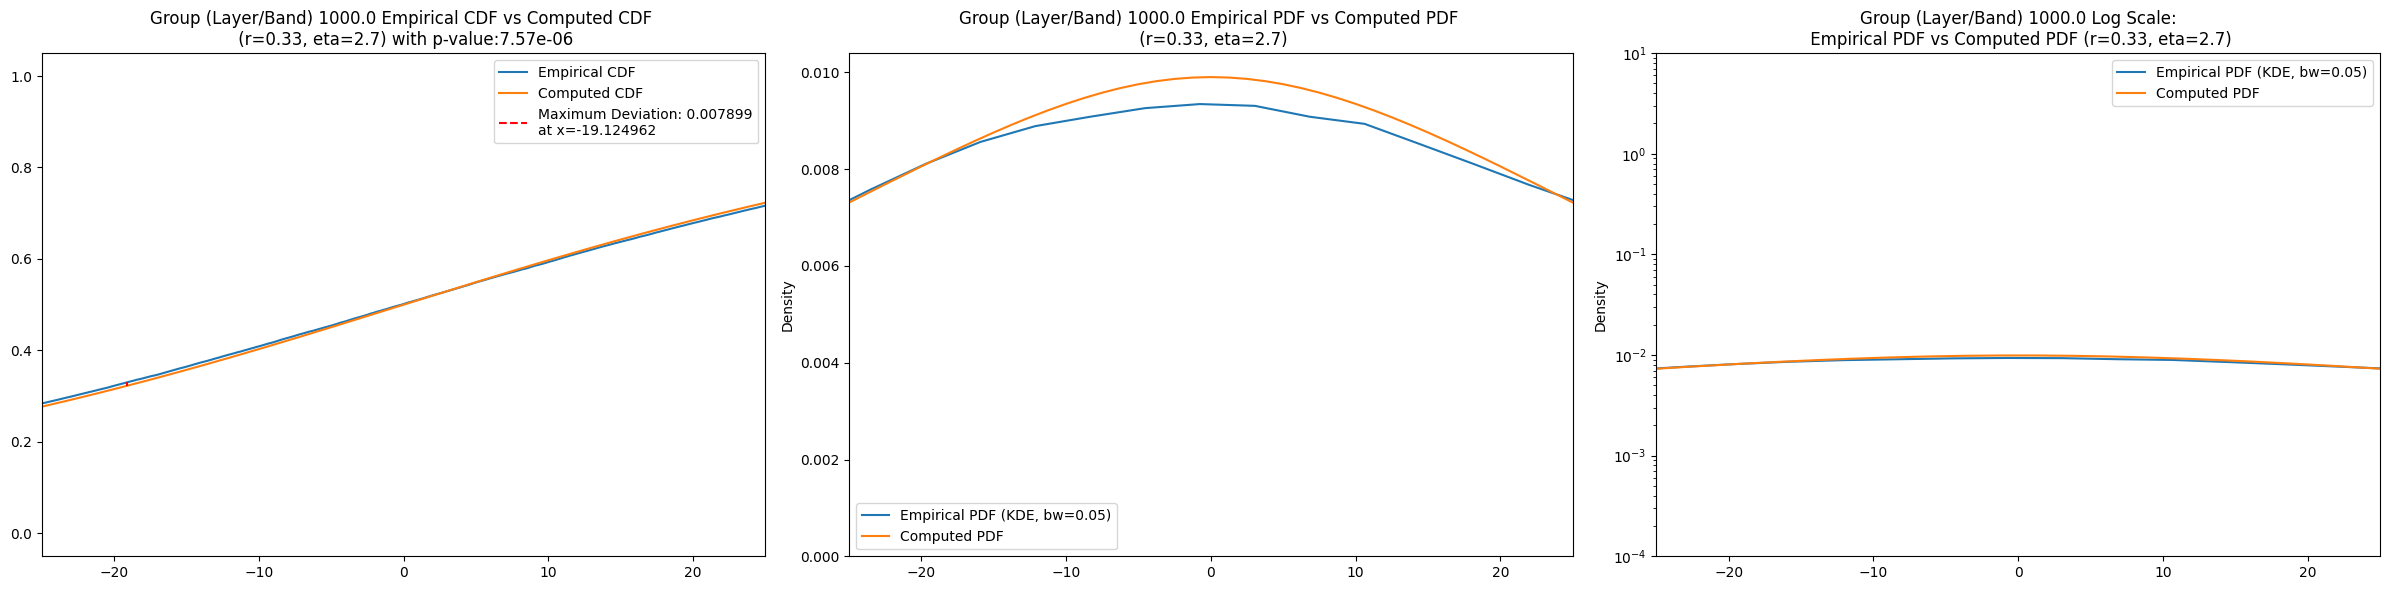

In [21]:
for group in GROUPS:
    group_info = master_df.loc[group]
    best_r = group_info['best_r']
    best_eta = group_info['best_eta']
    fig = visualize_cdf_pdf(sample = group_data_map[group], 
                    params = (best_r, best_eta), 
                    log_scale = True,
                    group = group,
                    n_samples=200
                    #interval = (-500, 500),
                    #provided_loc=200
                    )
    fig.savefig(os.path.join(CWD, "plots", f'compare_cdf_pdf_layer_{group}.jpg'), bbox_inches = 'tight', dpi = 300)

## Comparing with Gaussian and Laplace Priors

In [22]:
def generate_func(sample, distro, *args, n_samples=200):
    if distro == 'gaussian' or distro == 'normal':
        def var_func(var):
            cdf = scipy.stats.norm(scale=var).cdf
            return compute_ksstat(sample, cdf)
        return var_func
    elif distro == 'laplace':
        def var_func(var):
            cdf = scipy.stats.laplace(scale=var).cdf
            return compute_ksstat(sample, cdf)
        return var_func
    elif distro == 't':
        def var_func(var):
            cdf = scipy.stats.t(df=2, scale=var).cdf
            return compute_ksstat(sample, cdf)
        return var_func
    elif distro == 'prior_r':
        eta = args[0]
        def r_func(r):
            cdf = compute_prior_cdf(r, eta, n_samples=n_samples)
            return compute_ksstat(sample, cdf)
        return r_func
    elif distro == 'prior_eta':
        r = args[0]
        def eta_func(eta):
            cdf = compute_prior_cdf(r, eta, n_samples=n_samples)
            return compute_ksstat(sample, cdf)
        return eta_func
    elif distro == 'prior':
        def r_eta_func(params):
            r = params[0]
            eta = params[1]
            cdf = compute_prior_cdf(r, eta, n_samples=n_samples, debug=False)
            return compute_ksstat(sample, cdf)
        return r_eta_func

    print("Please enter a valid argument for `distro`: 'gaussian', 'laplace', 'prior_r', 'prior_eta', 'prior', 't'")

In [23]:
master_df_path = Path(os.path.join(CWD, "CSVs", 'master_df.csv'))

if RERUN or not master_df_path.exists():
    upper_bound = int(1e6)
    for group in GROUPS:
        norm_result = scipy.optimize.minimize_scalar(generate_func(group_data_map[group], 'gaussian'), method = 'bounded', bounds = (0, upper_bound))
        laplace_result = scipy.optimize.minimize_scalar(generate_func(group_data_map[group], 'laplace'), method = 'bounded', bounds = (0, upper_bound))
        t_result = scipy.optimize.minimize_scalar(generate_func(group_data_map[group], 't'), method = 'bounded', bounds = (0, upper_bound))
        
        master_df.loc[group, 'param_gaussian'] = round_to_sigfigs(norm_result['x'], 6)
        master_df.loc[group, 'kstest_stat_gaussian'] = round_to_sigfigs(norm_result['fun'], 6)
        master_df.loc[group, 'kstest_pval_gaussian'] = round_to_sigfigs(stats.kstwo(n=master_df.loc[group, 'total_samples']).sf(master_df.loc[group, 'kstest_stat_gaussian']), 6)

        master_df.loc[group, 'param_laplace'] = round_to_sigfigs(laplace_result['x'], 6)
        master_df.loc[group, 'kstest_stat_laplace'] = round_to_sigfigs(laplace_result['fun'], 6)
        master_df.loc[group, 'kstest_pval_laplace'] = round_to_sigfigs(stats.kstwo(n=master_df.loc[group, 'total_samples']).sf(master_df.loc[group, 'kstest_stat_laplace']), 6)

        master_df.loc[group, 'param_laplace'] = round_to_sigfigs(laplace_result['x'], 6)
        master_df.loc[group, 'kstest_stat_laplace'] = round_to_sigfigs(laplace_result['fun'], 6)
        master_df.loc[group, 'kstest_pval_laplace'] = round_to_sigfigs(stats.kstwo(n=master_df.loc[group, 'total_samples']).sf(master_df.loc[group, 'kstest_stat_laplace']), 6) 

        master_df.loc[group, 'param_t'] = round_to_sigfigs(t_result['x'], 6)
        master_df.loc[group, 'kstest_stat_t'] = round_to_sigfigs(t_result['fun'], 6)
        master_df.loc[group, 'kstest_pval_t'] = round_to_sigfigs(stats.kstwo(n=master_df.loc[group, 'total_samples']).sf(master_df.loc[group, 'kstest_stat_t']), 6) 

        master_df.loc[group, 'kstest_pval_gengamma'] = round_to_sigfigs(stats.kstwo(n=master_df.loc[group, 'total_samples']).sf(master_df.loc[group, 'kstest_stat_best']))

    master_df.to_csv(os.path.join(CWD, "CSVs", 'master_df.csv'))
    
master_df = pd.read_csv(os.path.join(CWD, "CSVs", 'master_df.csv'), index_col = GROUP)
master_df

obs_var    var_lower    var_upper  obs_kurt  kurt_lower  \
scale                                                                    
0.3162        0.790476     0.682967     0.922652  1.180593    0.331785   
0.4833        1.219052     1.049723     1.389108  1.170011    0.341924   
0.7071        1.766919     1.535066     2.032187  1.154426    0.374695   
0.7386        1.831360     1.607561     2.089132  1.174598    0.329283   
1.0000        2.510904     2.163976     2.883629  1.189316    0.333298   
1.1290        2.816910     2.419637     3.240292  1.134522    0.347329   
1.7250        4.293771     3.682135     4.922435  1.247803    0.329209   
2.6370        6.598141     5.703405     7.531285  1.204222    0.343955   
4.0300       10.133139     8.797777    11.538563  1.288081    0.351900   
6.1580       15.464858    13.285058    17.790633  1.130144    0.348468   
9.4120       23.246507    19.860002    26.594510  1.152443    0.324830   
14.3800      35.843058    31.199047    41.649831  1.126988    0.333474   
21.9800      54.995503    47.084300    63.013318  1.203045    0.317721   
33.6000      82.920489    70.735570    94.121590  1.188054    0.385546   
51.3500     127.792530   109.339894   147.477991  1.168185    0.350664   
78.4800     196.166613   168.059940   227.526662  1.118663    0.288004   
119.9000    300.211163   259.986421   346.465388  1.164514    0.293473   
183.3000    455.066067   394.947906   535.180819  1.183842    0.361975   
280.1000    693.192078   597.067980   793.714257  1.098701    0.355469   
428.1000   1065.216086   914.749578  1232.923317  1.138999    0.321895   
654.3000   1623.127532  1394.604121  1872.070145  1.126099    0.310972   
1000.0000  2519.167344  2183.680883  2891.181094  1.217184    0.390257   

           kurt_upper  total_samples  initial_r  initial_eta  \
scale                                                          
0.3162       2.699540       100000.0       2.40          0.3   
0.4833       2.429173       100000.0       1.46          0.6   
0.7071       2.244440       100000.0       1.16          0.8   
0.7386       3.498762       100000.0       1.14          0.8   
1.0000       2.563086       100000.0       1.02          1.1   
1.1290       3.525764       100000.0       0.98          1.2   
1.7250       2.513266       100000.0       0.84          1.3   
2.6370       3.311856       100000.0       0.75          1.5   
4.0300       5.224419       100000.0       0.65          1.4   
6.1580       3.757000       100000.0       0.65          2.2   
9.4120       2.520646       100000.0       0.58          2.0   
14.3800      2.426455       100000.0       0.55          2.3   
21.9800      2.708552       100000.0       0.52          2.5   
33.6000      2.650974       100000.0       0.50          2.9   
51.3500      3.661705       100000.0       0.47          2.9   
78.4800      2.742142       100000.0       0.44          2.8   
119.9000     2.534281       100000.0       0.41          2.6   
183.3000     2.736602       100000.0       0.39          2.6   
280.1000     2.332704       100000.0       0.38          2.9   
428.1000     2.455563       100000.0       0.36          2.8   
654.3000     3.272933       100000.0       0.34          2.6   
1000.0000    3.951625       100000.0       0.33          2.7   

           kstest_stat_initial  ...  param_gaussian  kstest_stat_gaussian  \
scale                           ...                                         
0.3162                0.003230  ...        0.821331              0.012764   
0.4833                0.001917  ...        1.021400              0.012758   
0.7071                0.001966  ...        1.231610              0.012826   
0.7386                0.002405  ...        1.243000              0.013199   
1.0000                0.002420  ...        1.459020              0.012827   
1.1290                0.002995  ...        1.553820              0.013147   
1.7250                0.002637  ...        1.919300              0.013285   
2.6370  

In [24]:
# def add_metric_tail(metric_name = 'kstest_ratio',  distro = 'gengamma', tail_cutoffs = [0], layers = np.arange(2, 9)):
#     if metric_name == 'kstest_ratio':
#         metric = compute_ksratio
#     elif metric_name == 'kstest_stat':
#         metric = compute_ksstat_tail

#     for tail_cutoff in tail_cutoffs:
#         metrics = []
#         for layer in layers:
#             if distro == 'gengamma':
#                 cdf = all_cdfs[(master_df.loc[layer, 'initial_r'], master_df.loc[layer, 'initial_eta'])]
#             elif distro == 'gaussian':
#                 cdf = scipy.stats.norm(scale = master_df.loc[layer, 'param_gaussian']).cdf
#             elif distro == 'laplace':
#                 cdf = scipy.stats.norm(scale = master_df.loc[layer, 'param_laplace']).cdf
#             elif distro == 't':
#                 cdf = scipy.stats.t(df = 2, scale = master_df.loc[layer, 'param_t']).cdf
#             metrics.append(metric(group_data_map[layer], cdf, tail_cutoff = tail_cutoff))
#         master_df[metric_name + '_' + distro + '_' + f'tail{tail_cutoff}'] = metrics
        
# for group in GROUPS:
#     add_metric_tail('kstest_ratio', distro = 'gengamma', tail_cutoffs= [0,10], layers = np.arange(2, 9))
#     add_metric_tail('kstest_ratio', distro = 'gaussian', tail_cutoffs= [0,10], layers = np.arange(2, 9)) 
#     add_metric_tail('kstest_ratio', distro = 'laplace', tail_cutoffs= [0,10], layers = np.arange(2, 9))
#     add_metric_tail('kstest_ratio', distro = 't', tail_cutoffs= [0,10], layers = np.arange(2, 9))
#     add_metric_tail('kstest_stat', distro = 'gengamma', tail_cutoffs= [2, 10], layers = np.arange(2, 9))

# master_df.to_csv(os.path.join(CWD, "CSVs", 'master_df.csv'))

# master_df = pd.read_csv(os.path.join(CWD, "CSVs", 'master_df.csv'), index_col = GROUP)
# master_df

## Results

In [25]:
import pandas as pd
import os
master_df = pd.read_csv(os.path.join(os.getcwd(), "CSVs", 'master_df.csv'), index_col = 0)

In [26]:
master_df#.filter(regex='total_samples|kstest_stat.*')
#master_df.filter(regex='total_samples|param.*')
# master_df.filter(regex='.*gaussian')
#master_df.filter(regex='kstest_stat_.*[\_(tail\d)]')
#master_df.filter(regex='.*_tail\d\d?')
#master_df.filter(regex='.*_t_.*')


obs_var    var_lower    var_upper  obs_kurt  kurt_lower  \
scale                                                                    
0.3162        0.790476     0.682967     0.922652  1.180593    0.331785   
0.4833        1.219052     1.049723     1.389108  1.170011    0.341924   
0.7071        1.766919     1.535066     2.032187  1.154426    0.374695   
0.7386        1.831360     1.607561     2.089132  1.174598    0.329283   
1.0000        2.510904     2.163976     2.883629  1.189316    0.333298   
1.1290        2.816910     2.419637     3.240292  1.134522    0.347329   
1.7250        4.293771     3.682135     4.922435  1.247803    0.329209   
2.6370        6.598141     5.703405     7.531285  1.204222    0.343955   
4.0300       10.133139     8.797777    11.538563  1.288081    0.351900   
6.1580       15.464858    13.285058    17.790633  1.130144    0.348468   
9.4120       23.246507    19.860002    26.594510  1.152443    0.324830   
14.3800      35.843058    31.199047    41.649831  1.126988    0.333474   
21.9800      54.995503    47.084300    63.013318  1.203045    0.317721   
33.6000      82.920489    70.735570    94.121590  1.188054    0.385546   
51.3500     127.792530   109.339894   147.477991  1.168185    0.350664   
78.4800     196.166613   168.059940   227.526662  1.118663    0.288004   
119.9000    300.211163   259.986421   346.465388  1.164514    0.293473   
183.3000    455.066067   394.947906   535.180819  1.183842    0.361975   
280.1000    693.192078   597.067980   793.714257  1.098701    0.355469   
428.1000   1065.216086   914.749578  1232.923317  1.138999    0.321895   
654.3000   1623.127532  1394.604121  1872.070145  1.126099    0.310972   
1000.0000  2519.167344  2183.680883  2891.181094  1.217184    0.390257   

           kurt_upper  total_samples  initial_r  initial_eta  \
scale                                                          
0.3162       2.699540       100000.0       2.40          0.3   
0.4833       2.429173       100000.0       1.46          0.6   
0.7071       2.244440       100000.0       1.16          0.8   
0.7386       3.498762       100000.0       1.14          0.8   
1.0000       2.563086       100000.0       1.02          1.1   
1.1290       3.525764       100000.0       0.98          1.2   
1.7250       2.513266       100000.0       0.84          1.3   
2.6370       3.311856       100000.0       0.75          1.5   
4.0300       5.224419       100000.0       0.65          1.4   
6.1580       3.757000       100000.0       0.65          2.2   
9.4120       2.520646       100000.0       0.58          2.0   
14.3800      2.426455       100000.0       0.55          2.3   
21.9800      2.708552       100000.0       0.52          2.5   
33.6000      2.650974       100000.0       0.50          2.9   
51.3500      3.661705       100000.0       0.47          2.9   
78.4800      2.742142       100000.0       0.44          2.8   
119.9000     2.534281       100000.0       0.41          2.6   
183.3000     2.736602       100000.0       0.39          2.6   
280.1000     2.332704       100000.0       0.38          2.9   
428.1000     2.455563       100000.0       0.36          2.8   
654.3000     3.272933       100000.0       0.34          2.6   
1000.0000    3.951625       100000.0       0.33          2.7   

           kstest_stat_initial  ...  param_gaussian  kstest_stat_gaussian  \
scale                           ...                                         
0.3162                0.003230  ...        0.821331              0.012764   
0.4833                0.001917  ...        1.021400              0.012758   
0.7071                0.001966  ...        1.231610              0.012826   
0.7386                0.002405  ...        1.243000              0.013199   
1.0000                0.002420  ...        1.459020              0.012827   
1.1290                0.002995  ...        1.553820              0.013147   
1.7250                0.002637  ...        1.919300              0.013285   
2.6370  